# Binary Classification Model for Multiple Datasets

This notebook reads multiple datasets, preprocesses the data, trains and evaluates a neural network model for binary classification, and saves predictions to each dataset's folder.

early stopping, metric tracking, and processes each dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Base path for datasets
base_path = '../Competition_data'
dataset_folders = [os.path.join(base_path, folder) for folder in os.listdir(base_path)]


In [2]:

def preprocess_data(X, y=None):
    X = X.fillna(X.mean())
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    if y is not None:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=y.squeeze())
        plt.title('Target Variable Distribution')
        plt.show()
    return X_scaled


In [3]:

def create_and_train_model(X_train, y_train, X_val, y_val, input_dim):
    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])
    
    # Set up early stopping with 'val_auc' and mode 'max'
    early_stopping = EarlyStopping(monitor='val_auc', mode='max', patience=5, restore_best_weights=True)
    
    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])
    
    # Plot training history
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Val AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()
    plt.title('Training and Validation AUC')
    plt.show()
    
    return model


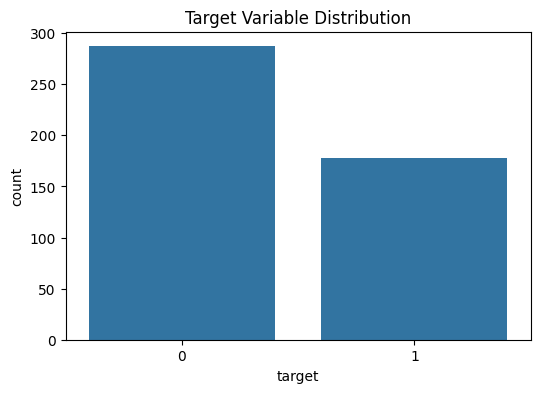

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc: 0.6122 - loss: 0.6963 - val_auc: 0.9522 - val_loss: 0.4799
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7989 - loss: 0.5511 - val_auc: 0.9706 - val_loss: 0.3783
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8786 - loss: 0.4582 - val_auc: 0.9811 - val_loss: 0.3073
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9193 - loss: 0.3916 - val_auc: 0.9856 - val_loss: 0.2544
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9406 - loss: 0.3443 - val_auc: 0.9900 - val_loss: 0.2134
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9520 - loss: 0.2901 - val_auc: 0.9931 - val_loss: 0.1810
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9734 - loss: 0.2309 - val_auc: 0.9957 - val_loss: 0.1562
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9669 - loss: 0.2375 - val_auc: 0.9978 - val_loss: 0.1364
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9772 - loss: 

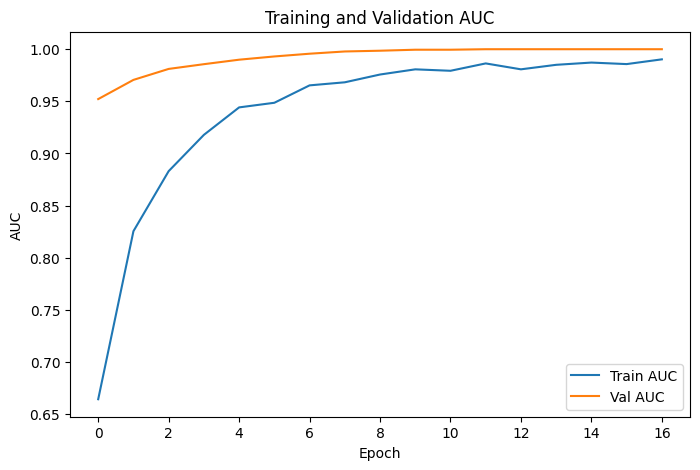

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
Dataset: ../Competition_data/Dataset_2
Accuracy: 0.967741935483871, Precision: 1.0, F1 Score: 0.958904109589041, Custom Score: 0.9779938135218738


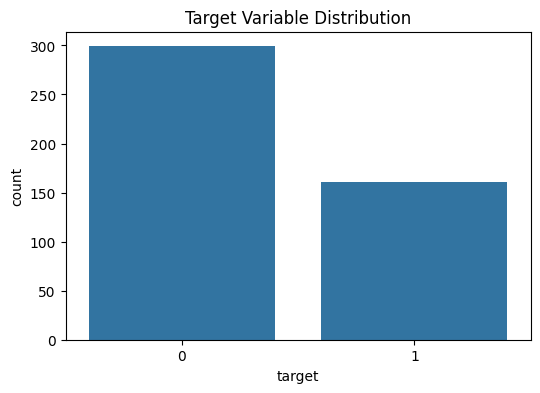

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.5384 - loss: 0.7517 - val_auc: 0.6207 - val_loss: 0.7051
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5888 - loss: 0.7183 - val_auc: 0.6825 - val_loss: 0.6591
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5757 - loss: 0.6965 - val_auc: 0.7142 - val_loss: 0.6302
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6540 - loss: 0.6477 - val_auc: 0.7454 - val_loss: 0.6060
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6550 - loss: 0.6458 - val_auc: 0.7634 - val_loss: 0.5880
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7086 - loss: 0.6145 - val_auc: 0.7712 - val_loss: 0.5716
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7496 - loss: 0.5918 - val_auc: 0.7806 - val_loss: 0.5554
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7271 - loss: 0.5941 - val_auc: 0.7831 - val_loss: 0.5416
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7895 - loss: 

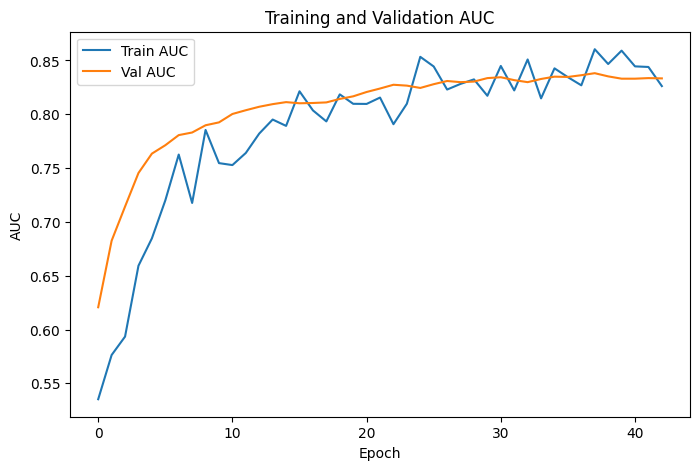

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step
Dataset: ../Competition_data/Dataset_35
Accuracy: 0.75, Precision: 0.6206896551724138, F1 Score: 0.6101694915254238, Custom Score: 0.6563267095265927


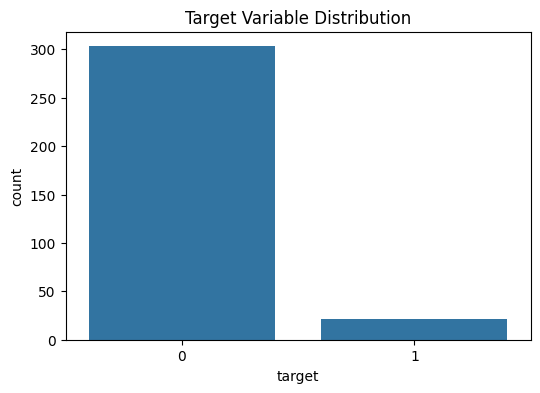

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.4693 - loss: 1.0905 - val_auc: 0.7283 - val_loss: 0.7345
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4429 - loss: 0.8749 - val_auc: 0.7467 - val_loss: 0.5982
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6252 - loss: 0.6715 - val_auc: 0.7500 - val_loss: 0.4948
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5016 - loss: 0.5513 - val_auc: 0.7167 - val_loss: 0.4221
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5062 - loss: 0.4761 - val_auc: 0.7117 - val_loss: 0.3691
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5643 - loss: 0.4575 - val_auc: 0.6783 - val_loss: 0.3286
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4789 - loss: 0.3663 - val_auc: 0.6617 - val_loss: 0.3003
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4335 - loss: 0.4071 - val_auc: 0.6550 - val_loss: 0.2822


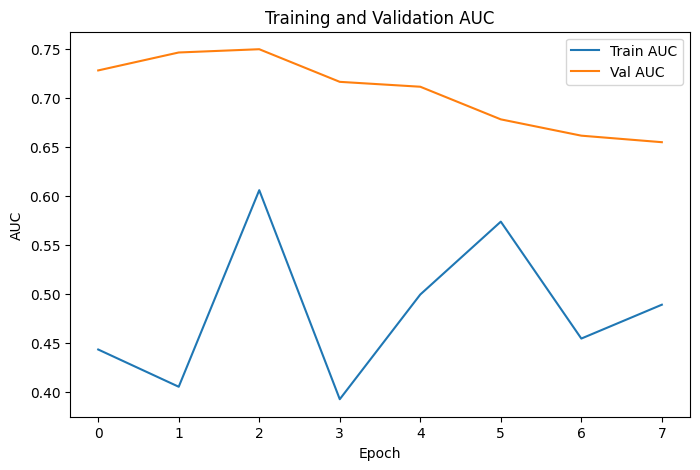

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
Dataset: ../Competition_data/Dataset_5
Accuracy: 0.8923076923076924, Precision: 0.25, F1 Score: 0.2222222222222222, Custom Score: 0.4343589743589743


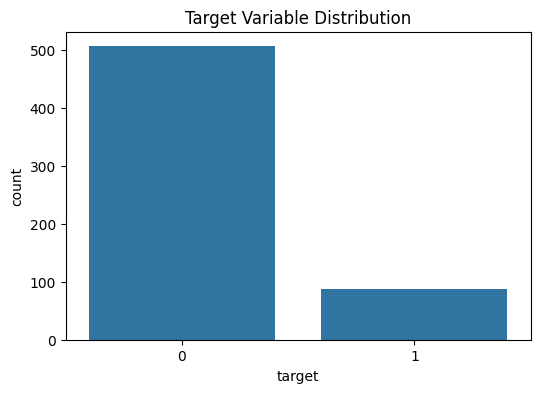

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.4708 - loss: 0.5950 - val_auc: 0.5203 - val_loss: 0.4866
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.5446 - loss: 0.5279 - val_auc: 0.7086 - val_loss: 0.4012
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5919 - loss: 0.4589 - val_auc: 0.8157 - val_loss: 0.3464
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.6308 - loss: 0.4354 - val_auc: 0.8324 - val_loss: 0.3157
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.7303 - loss: 0.3760 - val_auc: 0.8356 - val_loss: 0.2988
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.6695 - loss: 0.3828 - val_auc: 0.8324 - val_loss: 0.2906
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.7340 - loss: 0.3892 - val_auc: 0.8367 - val_loss: 0.2859
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.7289 - loss: 0.3990 - val_auc: 0.8356 - val_loss: 0.2814
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.7444 - loss: 

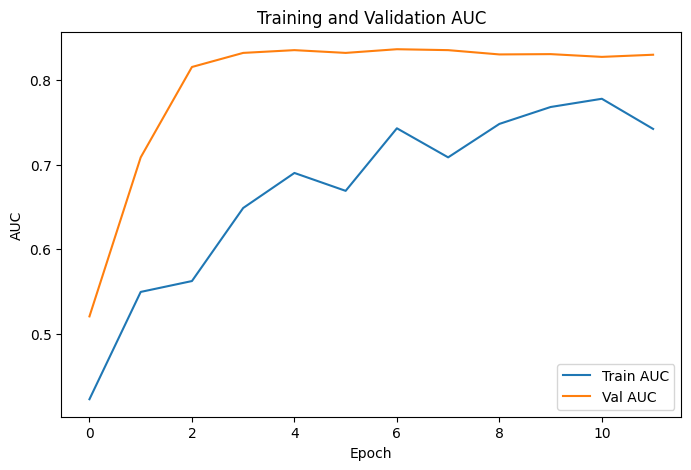

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
Dataset: ../Competition_data/Dataset_32
Accuracy: 0.8907563025210085, Precision: 0.0, F1 Score: 0.0, Custom Score: 0.2672268907563025


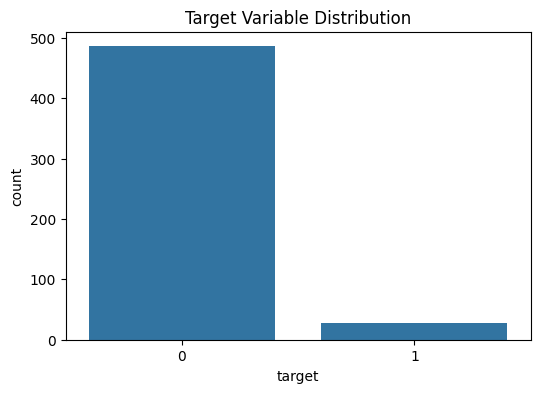

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc: 0.6005 - loss: 0.6808 - val_auc: 0.4398 - val_loss: 0.4332
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4078 - loss: 0.4976 - val_auc: 0.3214 - val_loss: 0.3200
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4805 - loss: 0.3507 - val_auc: 0.2714 - val_loss: 0.2611
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.3971 - loss: 0.3788 - val_auc: 0.2480 - val_loss: 0.2329
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6275 - loss: 0.2429 - val_auc: 0.2071 - val_loss: 0.2194
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.3592 - loss: 0.3322 - val_auc: 0.2000 - val_loss: 0.2166


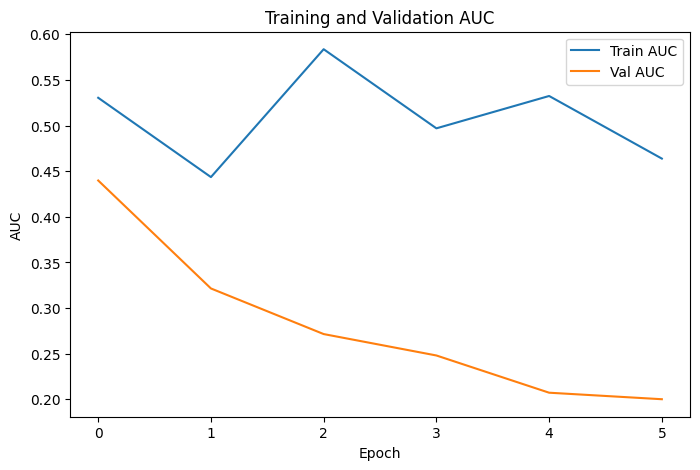

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
Dataset: ../Competition_data/Dataset_4
Accuracy: 0.9514563106796117, Precision: 0.0, F1 Score: 0.0, Custom Score: 0.2854368932038835


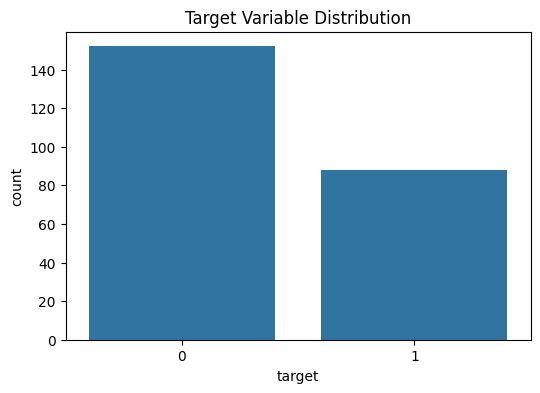

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.3556 - loss: 0.9447 - val_auc: 0.3340 - val_loss: 0.7314
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.5107 - loss: 0.7674 - val_auc: 0.7227 - val_loss: 0.6217
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5853 - loss: 0.7146 - val_auc: 0.9199 - val_loss: 0.5365
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6516 - loss: 0.6485 - val_auc: 0.9707 - val_loss: 0.4671
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7293 - loss: 0.5850 - val_auc: 0.9912 - val_loss: 0.4116
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8219 - loss: 0.5138 - val_auc: 0.9961 - val_loss: 0.3648
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8401 - loss: 0.4757 - val_auc: 0.9961 - val_loss: 0.3259
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9042 - loss: 0.4237 - val_auc: 0.9961 - val_loss: 0.2924
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8824 - loss: 0.4394 - val_auc:

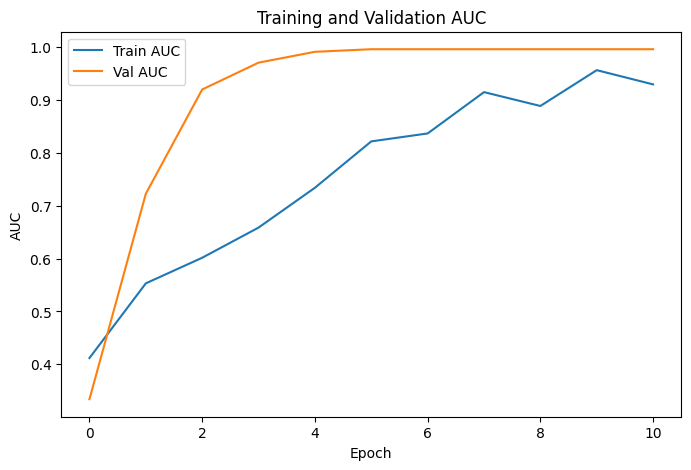

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Dataset: ../Competition_data/Dataset_33
Accuracy: 0.9375, Precision: 0.8823529411764706, F1 Score: 0.9090909090909091, Custom Score: 0.906918449197861


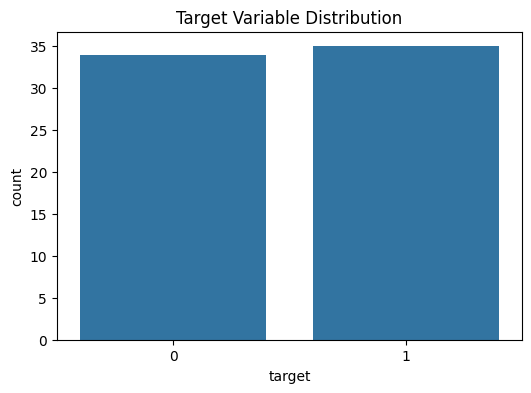

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - auc: 0.6049 - loss: 0.6707 - val_auc: 0.7083 - val_loss: 0.6115
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.5837 - loss: 0.6852 - val_auc: 0.7083 - val_loss: 0.6109
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.6376 - loss: 0.6755 - val_auc: 0.7083 - val_loss: 0.6104
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.6628 - loss: 0.6742 - val_auc: 0.7083 - val_loss: 0.6100
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.6660 - loss: 0.6576 - val_auc: 0.7188 - val_loss: 0.6100
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.4788 - loss: 0.7641 - val_auc: 0.7083 - val_loss: 0.6102
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.6254 - loss: 0.6871 - val_auc: 0.7083 - val_loss: 0.6102
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.6160 - loss: 0.6904 - val_auc: 0.7083 - val_loss: 0.6102
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.5084 - loss: 0.7250 - 

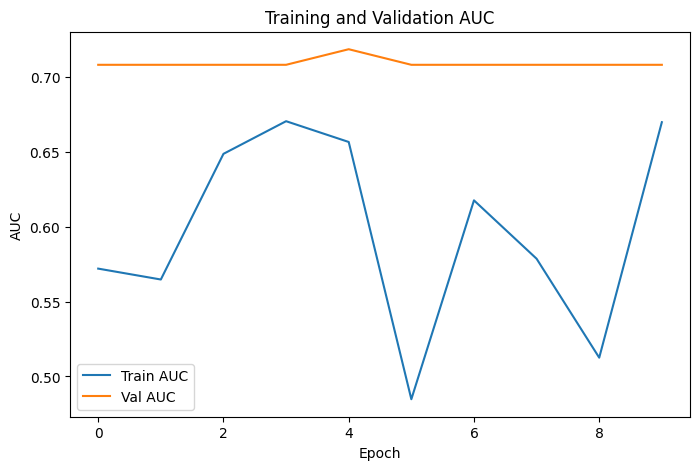

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Dataset: ../Competition_data/Dataset_3
Accuracy: 0.6428571428571429, Precision: 0.6666666666666666, F1 Score: 0.7058823529411765, Custom Score: 0.6712885154061625


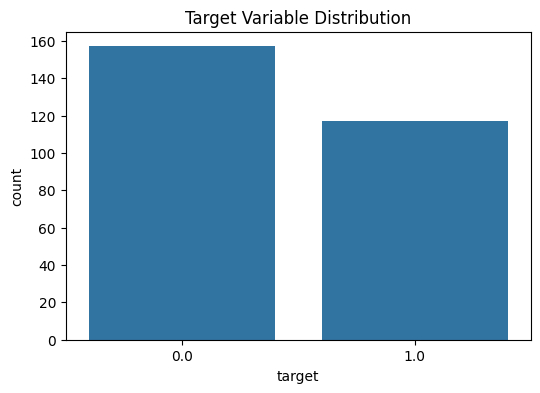

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - auc: 0.4998 - loss: 0.7682 - val_auc: 0.6250 - val_loss: 0.6789
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6206 - loss: 0.6898 - val_auc: 0.7529 - val_loss: 0.6337
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7169 - loss: 0.6121 - val_auc: 0.7993 - val_loss: 0.6026
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7008 - loss: 0.6276 - val_auc: 0.8071 - val_loss: 0.5795
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7843 - loss: 0.5833 - val_auc: 0.8100 - val_loss: 0.5632
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7446 - loss: 0.5930 - val_auc: 0.8043 - val_loss: 0.5523
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7968 - loss: 0.5739 - val_auc: 0.8107 - val_loss: 0.5408
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8420 - loss: 0.5226 - val_auc: 0.8164 - val_loss: 0.5309
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8266 - loss: 0.5118 - val_auc:

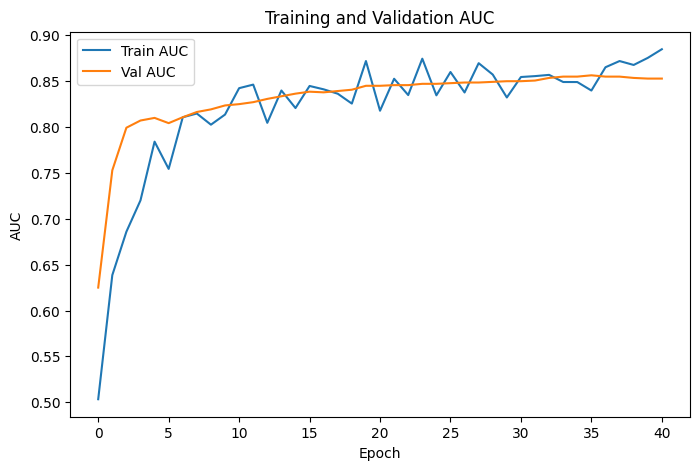

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Dataset: ../Competition_data/Dataset_34
Accuracy: 0.8, Precision: 0.7142857142857143, F1 Score: 0.7317073170731707, Custom Score: 0.745226480836237


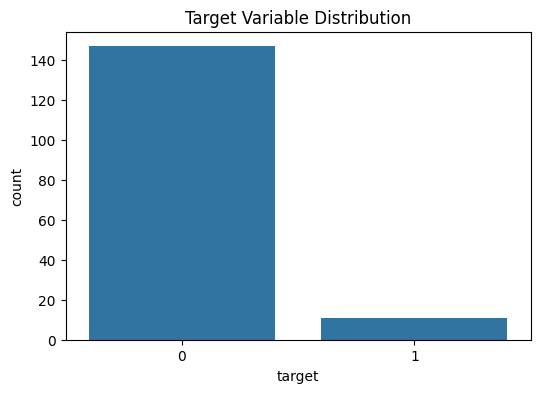

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - auc: 0.6920 - loss: 0.7117 - val_auc: 0.5500 - val_loss: 0.6890
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.2142 - loss: 0.7070 - val_auc: 0.5000 - val_loss: 0.6420
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6796 - loss: 0.6570 - val_auc: 0.4500 - val_loss: 0.5983
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.4125 - loss: 0.5931 - val_auc: 0.4250 - val_loss: 0.5583
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5583 - loss: 0.5871 - val_auc: 0.3583 - val_loss: 0.5238
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.3928 - loss: 0.5380 - val_auc: 0.3333 - val_loss: 0.4914


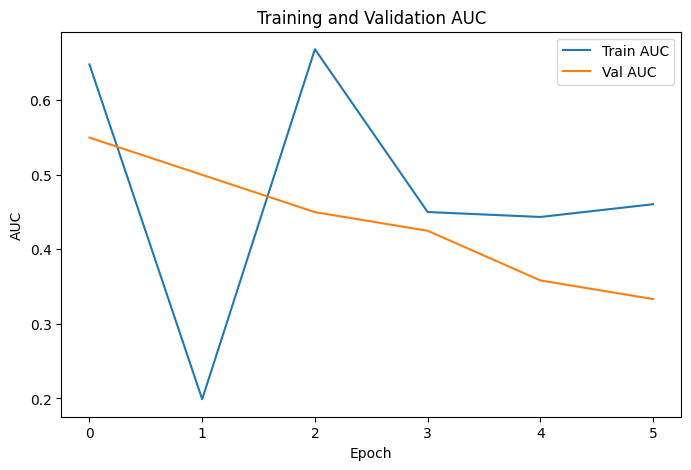

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Dataset: ../Competition_data/Dataset_45
Accuracy: 0.5625, Precision: 0.125, F1 Score: 0.2222222222222222, Custom Score: 0.28541666666666665


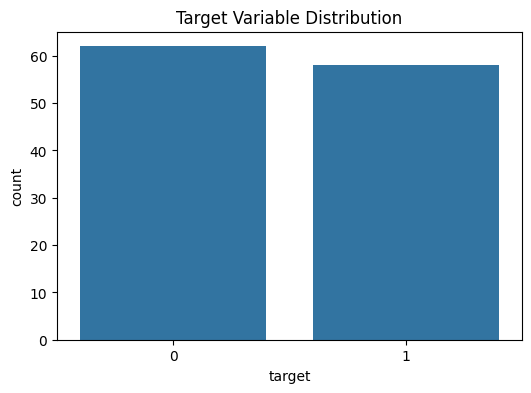

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - auc: 0.6231 - loss: 0.7142 - val_auc: 0.8287 - val_loss: 0.6616
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.7008 - loss: 0.6329 - val_auc: 0.9266 - val_loss: 0.6313
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.7129 - loss: 0.6288 - val_auc: 0.9615 - val_loss: 0.6039
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.6523 - loss: 0.6627 - val_auc: 0.9650 - val_loss: 0.5770
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.7517 - loss: 0.6064 - val_auc: 0.9860 - val_loss: 0.5495
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.8709 - loss: 0.5610 - val_auc: 0.9930 - val_loss: 0.5241
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.8119 - loss: 0.5849 - val_auc: 0.9930 - val_loss: 0.5011
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.8414 - loss: 0.5618 - val_auc: 0.9930 - val_loss: 0.4791
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.8363 - loss: 0.5515 - 

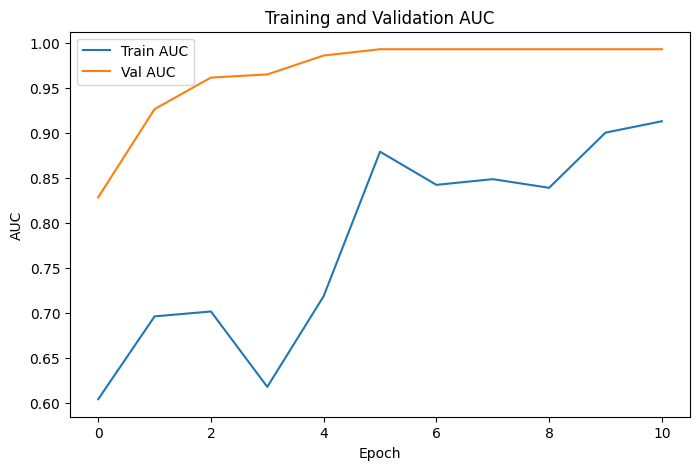

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/stepWARNING:tensorflow:5 out of the last 17 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x1750615e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Dataset: ../Competition_data/Dataset_42
Accuracy: 0.9583333333333334, Precision: 1.0, F1 Sc

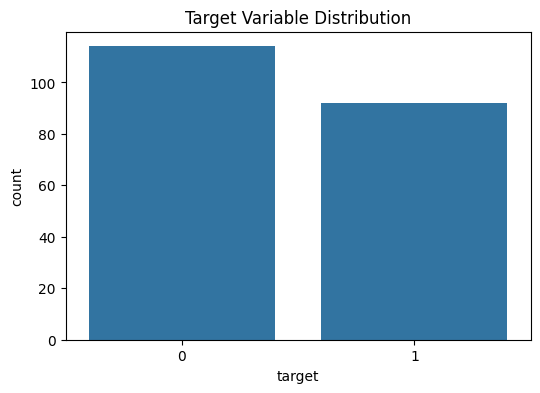

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - auc: 0.6160 - loss: 0.6739 - val_auc: 0.9329 - val_loss: 0.6003
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.7080 - loss: 0.6279 - val_auc: 0.9706 - val_loss: 0.5418
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.7341 - loss: 0.6213 - val_auc: 0.9871 - val_loss: 0.4958
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.7330 - loss: 0.6117 - val_auc: 0.9929 - val_loss: 0.4544
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8232 - loss: 0.5543 - val_auc: 0.9953 - val_loss: 0.4163
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8793 - loss: 0.5058 - val_auc: 0.9953 - val_loss: 0.3797
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8698 - loss: 0.5025 - val_auc: 0.9976 - val_loss: 0.3457
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.9500 - loss: 0.4485 - val_auc: 0.9976 - val_loss: 0.3128
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.9374 - loss: 0.4280 - val_auc:

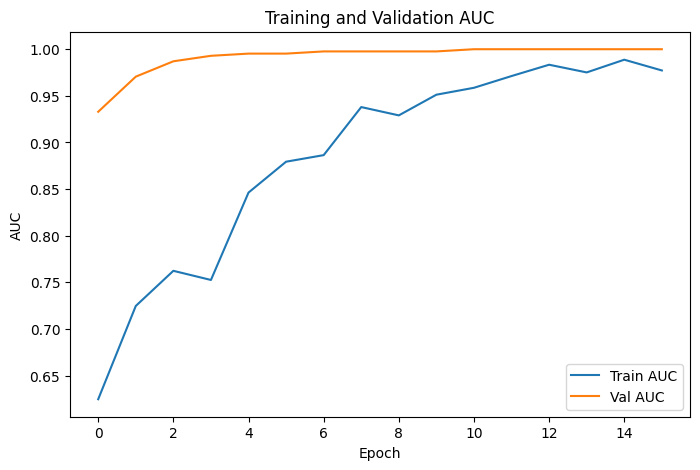

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
Dataset: ../Competition_data/Dataset_27
Accuracy: 1.0, Precision: 1.0, F1 Score: 1.0, Custom Score: 1.0


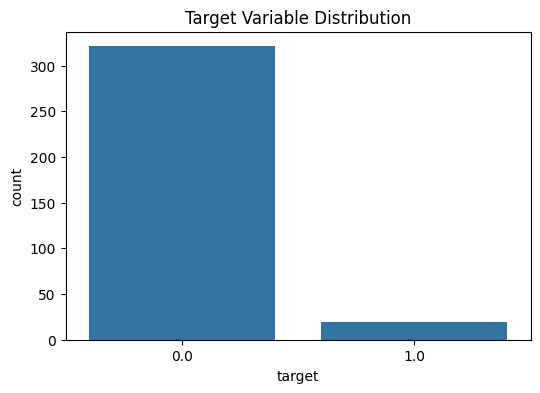

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - auc: 0.5760 - loss: 1.0454 - val_auc: 0.7235 - val_loss: 0.7408
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6638 - loss: 0.8078 - val_auc: 0.5606 - val_loss: 0.6065
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5434 - loss: 0.6696 - val_auc: 0.4735 - val_loss: 0.5063
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6138 - loss: 0.5895 - val_auc: 0.4583 - val_loss: 0.4301
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4868 - loss: 0.4839 - val_auc: 0.4280 - val_loss: 0.3656
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6033 - loss: 0.4243 - val_auc: 0.4773 - val_loss: 0.3097


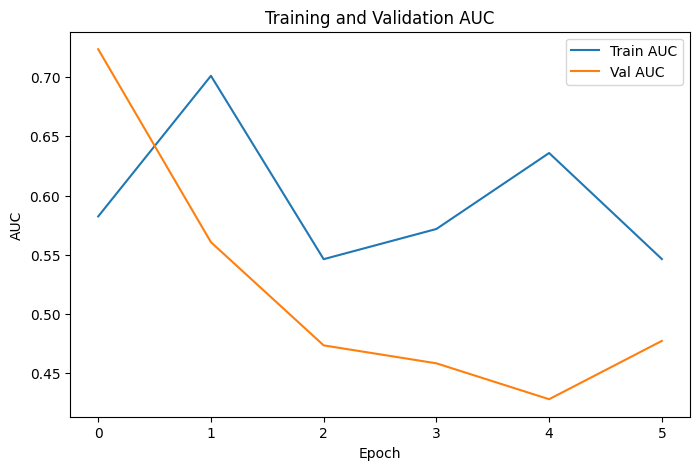

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
Dataset: ../Competition_data/Dataset_18
Accuracy: 0.3382352941176471, Precision: 0.0425531914893617, F1 Score: 0.08163265306122448, Custom Score: 0.14298166074940613


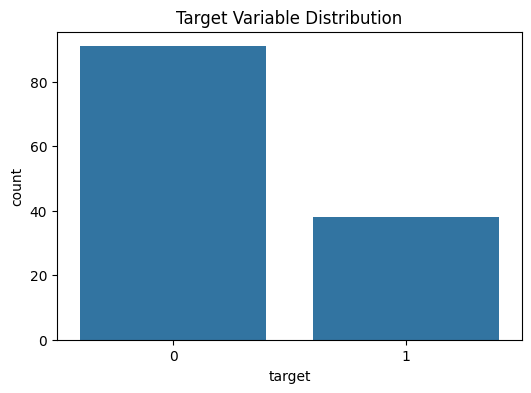

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - auc: 0.5023 - loss: 0.6340 - val_auc: 0.5758 - val_loss: 0.6942
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.6151 - loss: 0.5813 - val_auc: 0.6121 - val_loss: 0.6843
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.5249 - loss: 0.6223 - val_auc: 0.6879 - val_loss: 0.6709
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.4795 - loss: 0.6222 - val_auc: 0.7121 - val_loss: 0.6572
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.6177 - loss: 0.6120 - val_auc: 0.7394 - val_loss: 0.6432
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6586 - loss: 0.5637 - val_auc: 0.7636 - val_loss: 0.6320
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.6560 - loss: 0.5426 - val_auc: 0.7758 - val_loss: 0.6212
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6244 - loss: 0.5714 - val_auc: 0.8152 - val_loss: 0.6090
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6427 - loss: 0.5938 - val_auc:

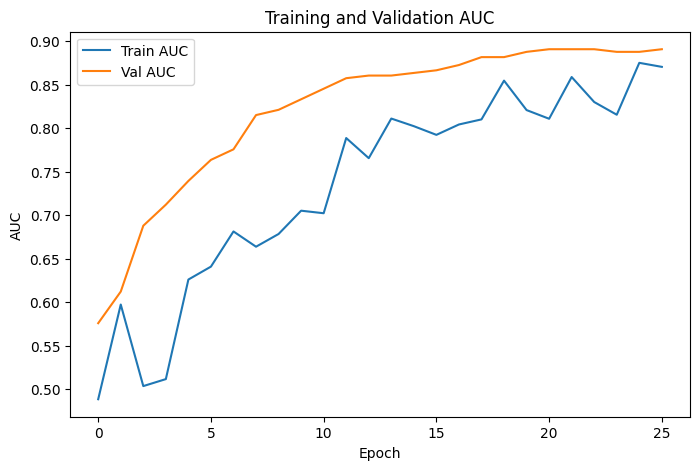

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Dataset: ../Competition_data/Dataset_20
Accuracy: 0.8461538461538461, Precision: 1.0, F1 Score: 0.7777777777777778, Custom Score: 0.8871794871794871


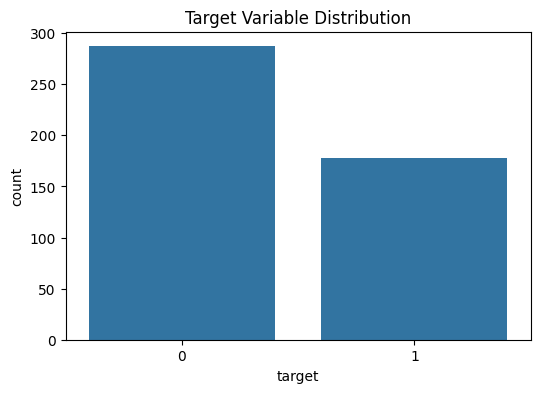

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.6795 - loss: 0.6667 - val_auc: 0.9591 - val_loss: 0.4432
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8140 - loss: 0.5425 - val_auc: 0.9770 - val_loss: 0.3415
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9052 - loss: 0.4207 - val_auc: 0.9876 - val_loss: 0.2759
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9294 - loss: 0.3639 - val_auc: 0.9902 - val_loss: 0.2263
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9594 - loss: 0.2989 - val_auc: 0.9943 - val_loss: 0.1862
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9402 - loss: 0.3101 - val_auc: 0.9962 - val_loss: 0.1555
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9616 - loss: 0.2567 - val_auc: 0.9998 - val_loss: 0.1321
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9856 - loss: 0.1964 - val_auc: 1.0000 - val_loss: 0.1151
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9763 - loss:

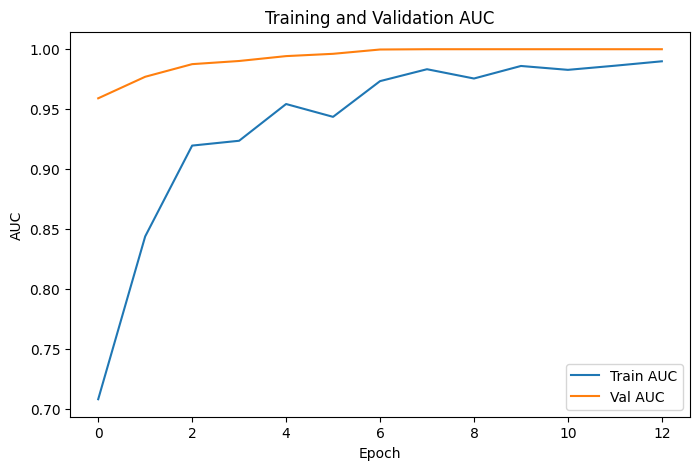

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
Dataset: ../Competition_data/Dataset_16
Accuracy: 0.978494623655914, Precision: 1.0, F1 Score: 0.972972972972973, Custom Score: 0.9854402789886662


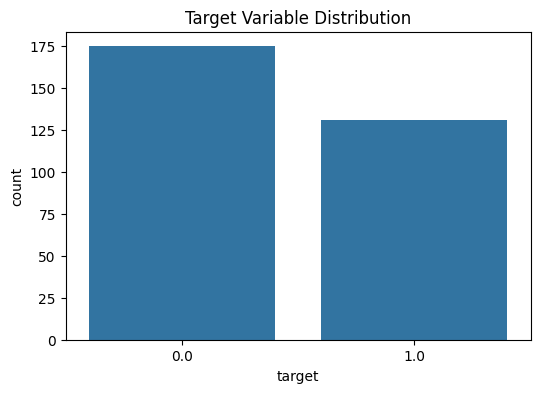

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - auc: 0.5559 - loss: 0.7514 - val_auc: 0.6092 - val_loss: 0.6850
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5678 - loss: 0.7594 - val_auc: 0.7357 - val_loss: 0.6384
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7180 - loss: 0.6277 - val_auc: 0.7730 - val_loss: 0.6080
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7745 - loss: 0.5703 - val_auc: 0.7789 - val_loss: 0.5884
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7471 - loss: 0.5848 - val_auc: 0.7941 - val_loss: 0.5741
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8084 - loss: 0.5486 - val_auc: 0.7989 - val_loss: 0.5626
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8688 - loss: 0.4893 - val_auc: 0.8016 - val_loss: 0.5528
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8771 - loss: 0.4573 - val_auc: 0.8043 - val_loss: 0.5445
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8633 - loss: 0.4899 - val_auc:

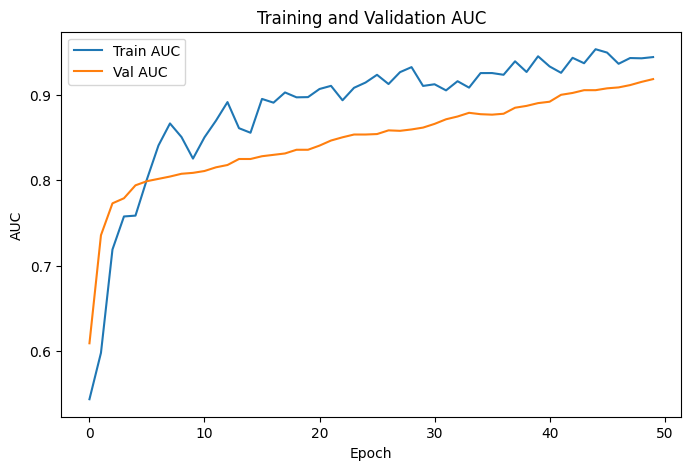

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
Dataset: ../Competition_data/Dataset_29
Accuracy: 0.8064516129032258, Precision: 0.8823529411764706, F1 Score: 0.7142857142857143, Custom Score: 0.8091623746272703


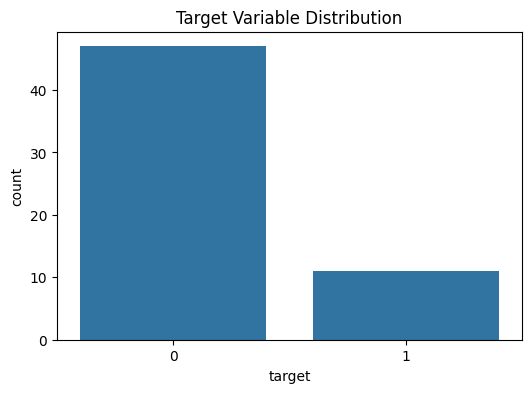

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - auc: 0.3417 - loss: 1.0386 - val_auc: 0.5429 - val_loss: 0.7124
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - auc: 0.7234 - loss: 0.6138 - val_auc: 0.5714 - val_loss: 0.7243
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.3472 - loss: 0.7297 - val_auc: 0.5714 - val_loss: 0.7421
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.6726 - loss: 0.4827 - val_auc: 0.5714 - val_loss: 0.7654
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.4901 - loss: 0.6077 - val_auc: 0.5714 - val_loss: 0.7906
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.6518 - loss: 0.5462 - val_auc: 0.5714 - val_loss: 0.8179
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.6158 - loss: 0.5485 - val_auc: 0.5714 - val_loss: 0.8447
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.5446 - loss: 0.5011 - val_auc: 0.5857 - val_loss: 0.8712
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.4287 - loss: 0.5406 - 

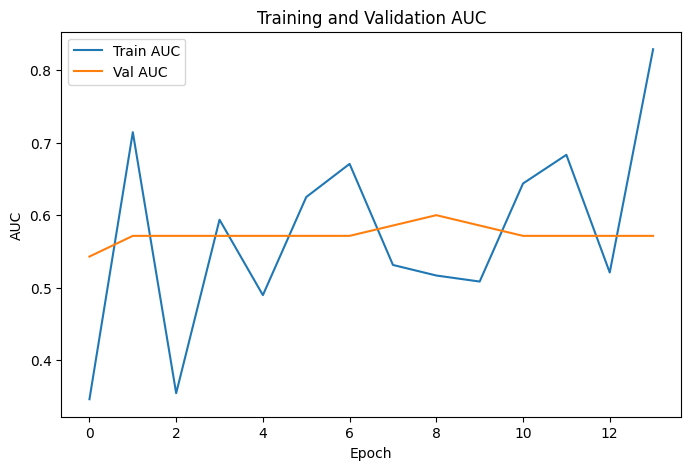

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Dataset: ../Competition_data/Dataset_11
Accuracy: 0.5833333333333334, Precision: 0.0, F1 Score: 0.0, Custom Score: 0.17500000000000002


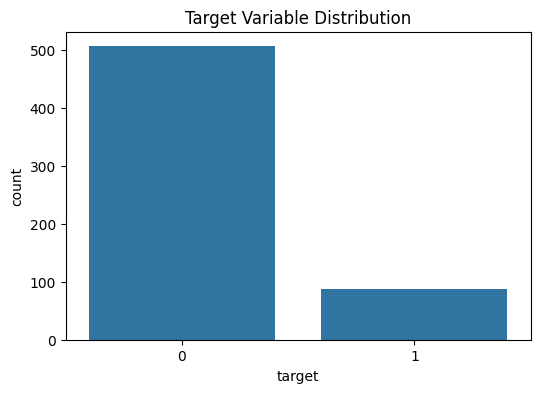

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc: 0.5137 - loss: 0.6801 - val_auc: 0.3276 - val_loss: 0.5961
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.3692 - loss: 0.5930 - val_auc: 0.3886 - val_loss: 0.4994
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4568 - loss: 0.5388 - val_auc: 0.5842 - val_loss: 0.4196
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4810 - loss: 0.5176 - val_auc: 0.7602 - val_loss: 0.3649
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6253 - loss: 0.4388 - val_auc: 0.8030 - val_loss: 0.3280
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6263 - loss: 0.4179 - val_auc: 0.8269 - val_loss: 0.3094
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6609 - loss: 0.4246 - val_auc: 0.8345 - val_loss: 0.2955
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6580 - loss: 0.4163 - val_auc: 0.8306 - val_loss: 0.2878
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7446 - loss: 

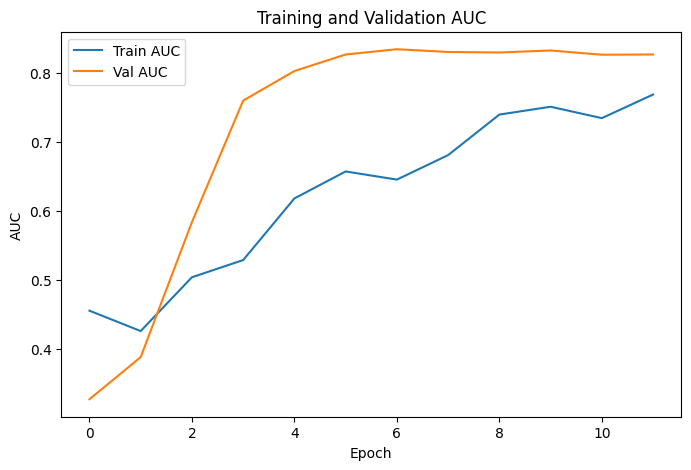

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Dataset: ../Competition_data/Dataset_43
Accuracy: 0.8907563025210085, Precision: 0.0, F1 Score: 0.0, Custom Score: 0.2672268907563025


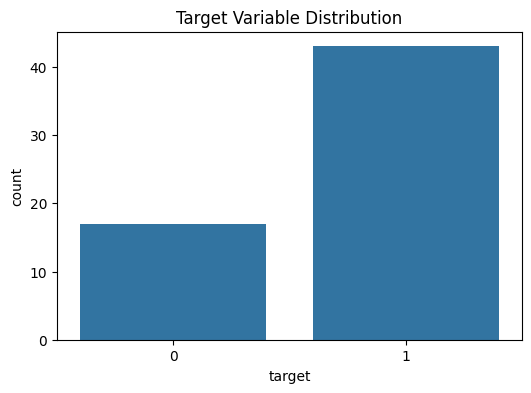

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - auc: 0.5003 - loss: 0.6546 - val_auc: 0.5000 - val_loss: 0.6592
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.4320 - loss: 0.6708 - val_auc: 0.5938 - val_loss: 0.6499
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - auc: 0.3238 - loss: 0.7063 - val_auc: 0.6250 - val_loss: 0.6405
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.5105 - loss: 0.6275 - val_auc: 0.6875 - val_loss: 0.6306
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc: 0.5210 - loss: 0.6128 - val_auc: 0.7344 - val_loss: 0.6203
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.7336 - loss: 0.5561 - val_auc: 0.7656 - val_loss: 0.6102
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - auc: 0.6166 - loss: 0.6197 - val_auc: 0.8438 - val_loss: 0.5998
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc: 0.6423 - loss: 0.5840 - val_auc: 0.8594 - val_loss: 0.5902
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - auc: 0.5912 - loss: 0.6266 -

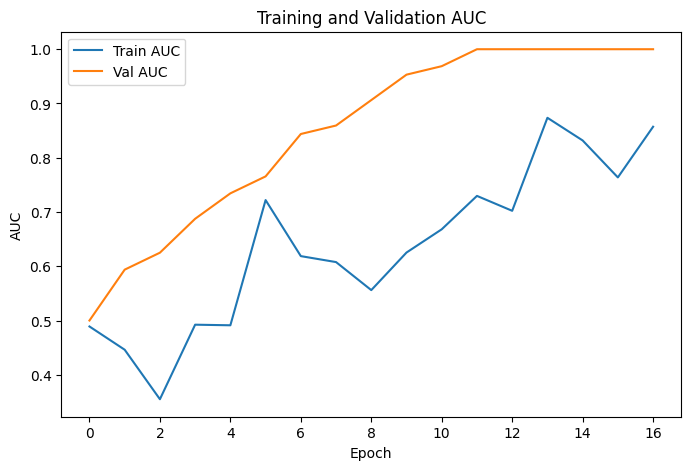

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Dataset: ../Competition_data/Dataset_44
Accuracy: 0.75, Precision: 0.7272727272727273, F1 Score: 0.8421052631578947, Custom Score: 0.7685406698564592


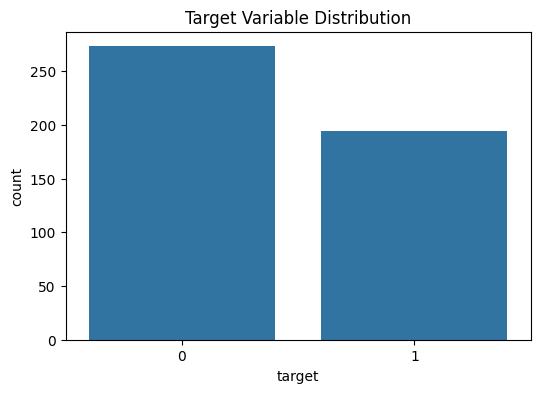

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.5100 - loss: 0.7228 - val_auc: 0.5392 - val_loss: 0.6771
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.5770 - loss: 0.6857 - val_auc: 0.6047 - val_loss: 0.6597
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6033 - loss: 0.6638 - val_auc: 0.6373 - val_loss: 0.6501
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6382 - loss: 0.6449 - val_auc: 0.6611 - val_loss: 0.6443
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6562 - loss: 0.6532 - val_auc: 0.6748 - val_loss: 0.6398
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6658 - loss: 0.6387 - val_auc: 0.6800 - val_loss: 0.6364
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6364 - loss: 0.6498 - val_auc: 0.6848 - val_loss: 0.6345
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6355 - loss: 0.6629 - val_auc: 0.6911 - val_loss: 0.6324
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6694 - loss:

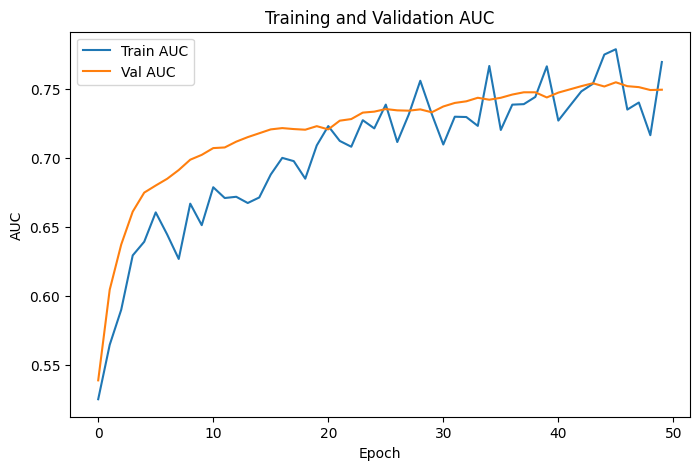

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Dataset: ../Competition_data/Dataset_10
Accuracy: 0.7340425531914894, Precision: 0.71875, F1 Score: 0.647887323943662, Custom Score: 0.7020789631405454


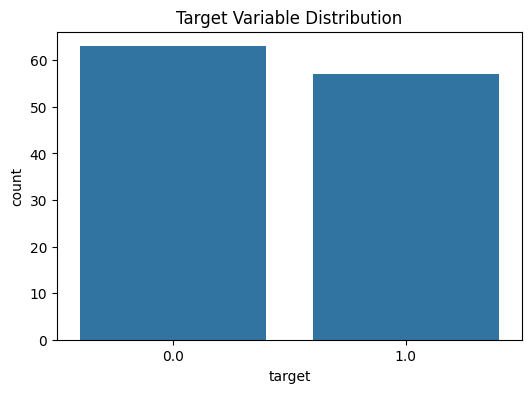

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - auc: 0.5197 - loss: 0.7972 - val_auc: 0.7519 - val_loss: 0.6576
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.5935 - loss: 0.7111 - val_auc: 0.8444 - val_loss: 0.6234
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6751 - loss: 0.6280 - val_auc: 0.8667 - val_loss: 0.5956
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7559 - loss: 0.5813 - val_auc: 0.9148 - val_loss: 0.5730
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6646 - loss: 0.6157 - val_auc: 0.9444 - val_loss: 0.5517
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7802 - loss: 0.5425 - val_auc: 0.9481 - val_loss: 0.5320
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.8148 - loss: 0.5162 - val_auc: 0.9481 - val_loss: 0.5139
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7677 - loss: 0.5777 - val_auc: 0.9481 - val_loss: 0.4963
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8771 - loss: 0.4542 - val_auc:

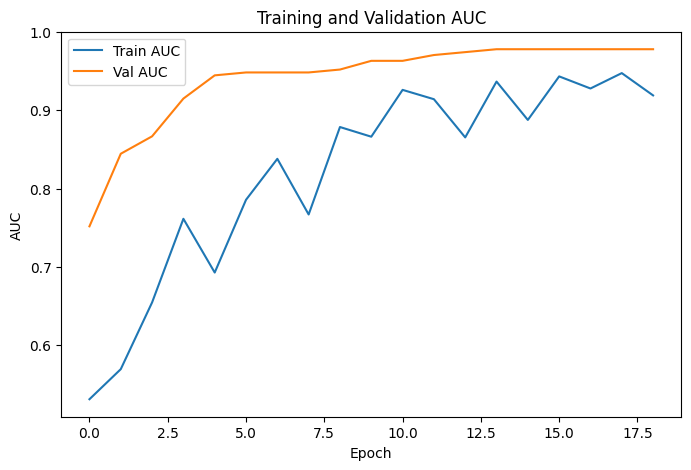

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Dataset: ../Competition_data/Dataset_17
Accuracy: 0.8333333333333334, Precision: 1.0, F1 Score: 0.8461538461538461, Custom Score: 0.9038461538461539


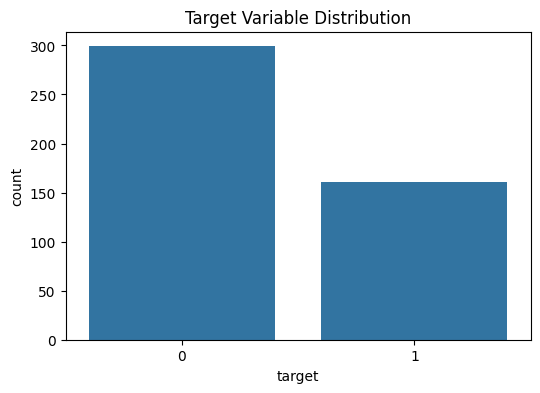

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc: 0.4723 - loss: 0.8390 - val_auc: 0.5339 - val_loss: 0.7105
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5600 - loss: 0.7204 - val_auc: 0.7124 - val_loss: 0.6391
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6775 - loss: 0.6428 - val_auc: 0.7968 - val_loss: 0.5918
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6761 - loss: 0.6211 - val_auc: 0.8269 - val_loss: 0.5589
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7188 - loss: 0.5994 - val_auc: 0.8352 - val_loss: 0.5348
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7551 - loss: 0.5766 - val_auc: 0.8352 - val_loss: 0.5149
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7976 - loss: 0.5347 - val_auc: 0.8325 - val_loss: 0.4991
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8119 - loss: 0.5141 - val_auc: 0.8325 - val_loss: 0.4890
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7647 - loss: 

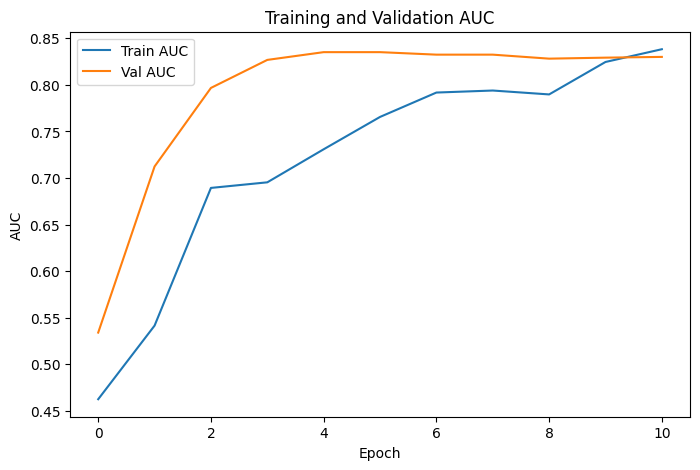

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
Dataset: ../Competition_data/Dataset_28
Accuracy: 0.7717391304347826, Precision: 0.8461538461538461, F1 Score: 0.5116279069767442, Custom Score: 0.7234716496849966


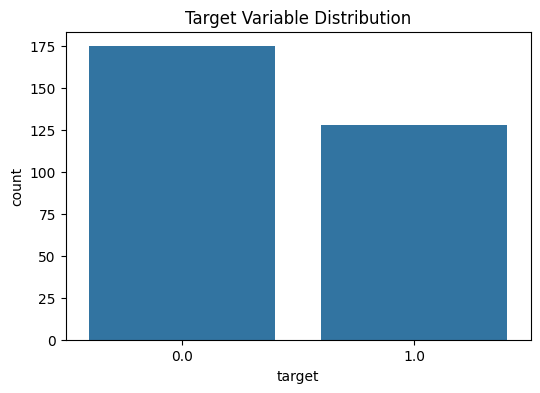

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - auc: 0.5099 - loss: 0.7759 - val_auc: 0.6952 - val_loss: 0.7374
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6056 - loss: 0.7276 - val_auc: 0.7366 - val_loss: 0.6859
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6295 - loss: 0.7018 - val_auc: 0.7576 - val_loss: 0.6458
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6760 - loss: 0.6758 - val_auc: 0.7756 - val_loss: 0.6151
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7223 - loss: 0.6310 - val_auc: 0.7960 - val_loss: 0.5895
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7774 - loss: 0.5850 - val_auc: 0.8077 - val_loss: 0.5657
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7838 - loss: 0.5467 - val_auc: 0.8182 - val_loss: 0.5481
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8047 - loss: 0.5577 - val_auc: 0.8310 - val_loss: 0.5321
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8172 - loss: 0.5354 - val_auc:

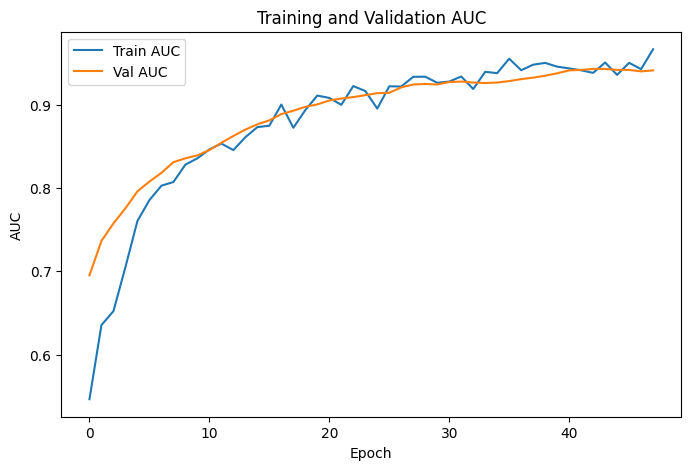

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
Dataset: ../Competition_data/Dataset_21
Accuracy: 0.8524590163934426, Precision: 0.76, F1 Score: 0.8085106382978723, Custom Score: 0.8022908964073945


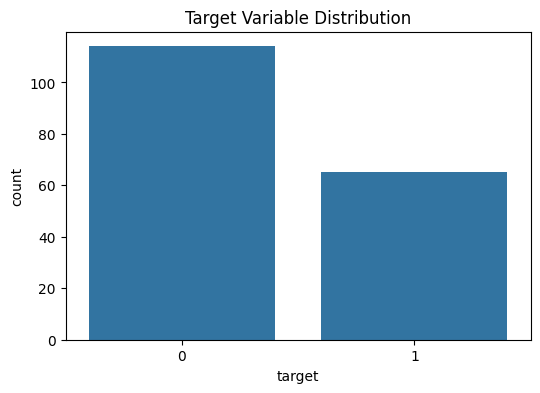

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - auc: 0.5450 - loss: 0.8178 - val_auc: 0.6462 - val_loss: 0.6583
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.3947 - loss: 0.8226 - val_auc: 0.7115 - val_loss: 0.6195
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6421 - loss: 0.6429 - val_auc: 0.7615 - val_loss: 0.5905
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5824 - loss: 0.7079 - val_auc: 0.7904 - val_loss: 0.5693
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6607 - loss: 0.6587 - val_auc: 0.7923 - val_loss: 0.5519
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6657 - loss: 0.6260 - val_auc: 0.7981 - val_loss: 0.5362
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.7252 - loss: 0.5827 - val_auc: 0.8000 - val_loss: 0.5229
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6983 - loss: 0.5930 - val_auc: 0.8154 - val_loss: 0.5118
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.8016 - loss: 0.5296 - val_auc:

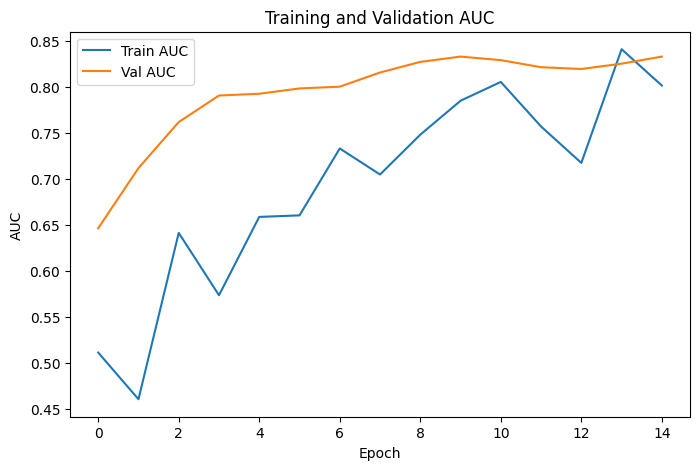

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Dataset: ../Competition_data/Dataset_26
Accuracy: 0.8055555555555556, Precision: 0.6666666666666666, F1 Score: 0.631578947368421, Custom Score: 0.6978070175438595


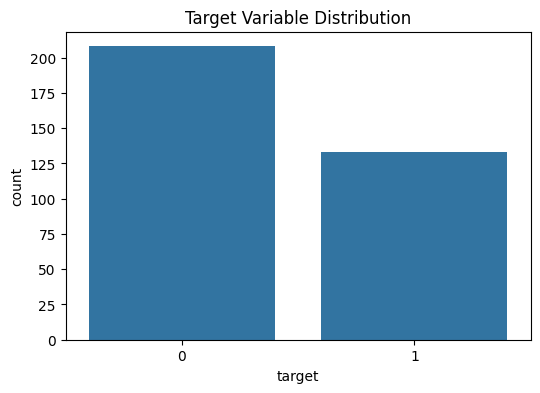

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.4354 - loss: 0.8335 - val_auc: 0.7734 - val_loss: 0.5998
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6219 - loss: 0.6645 - val_auc: 0.9096 - val_loss: 0.4898
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7798 - loss: 0.5536 - val_auc: 0.9378 - val_loss: 0.4150
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9049 - loss: 0.4355 - val_auc: 0.9519 - val_loss: 0.3616
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9255 - loss: 0.3802 - val_auc: 0.9555 - val_loss: 0.3238
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9209 - loss: 0.3937 - val_auc: 0.9603 - val_loss: 0.2954
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9573 - loss: 0.2974 - val_auc: 0.9674 - val_loss: 0.2719
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9560 - loss: 0.2767 - val_auc: 0.9683 - val_loss: 0.2525
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9578 - loss: 0.2811 - val_auc:

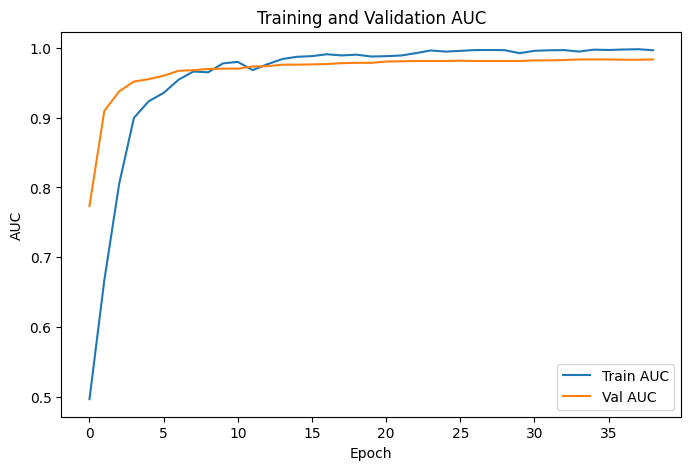

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
Dataset: ../Competition_data/Dataset_19
Accuracy: 0.9130434782608695, Precision: 0.8620689655172413, F1 Score: 0.8928571428571429, Custom Score: 0.8865977725423002


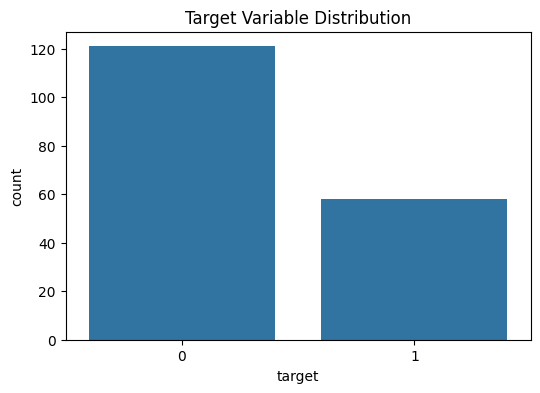

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.4293 - loss: 0.8038 - val_auc: 0.6364 - val_loss: 0.6630
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5463 - loss: 0.7070 - val_auc: 0.6709 - val_loss: 0.6440
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5214 - loss: 0.7341 - val_auc: 0.7073 - val_loss: 0.6235
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - auc: 0.4972 - loss: 0.7445 - val_auc: 0.7455 - val_loss: 0.6071
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6215 - loss: 0.6349 - val_auc: 0.7673 - val_loss: 0.5950
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5613 - loss: 0.6564 - val_auc: 0.7782 - val_loss: 0.5857
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5690 - loss: 0.6557 - val_auc: 0.7836 - val_loss: 0.5781
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5677 - loss: 0.6536 - val_auc: 0.7927 - val_loss: 0.5720
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6177 - loss: 0.6232 - val_auc

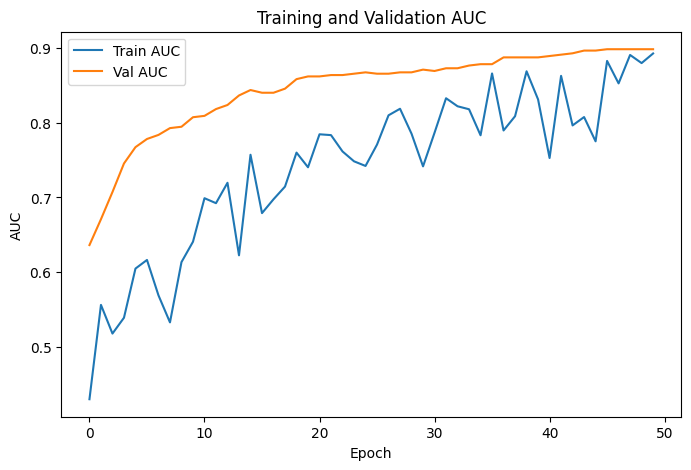

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Dataset: ../Competition_data/Dataset_8
Accuracy: 0.8055555555555556, Precision: 0.7, F1 Score: 0.6666666666666666, Custom Score: 0.7216666666666666


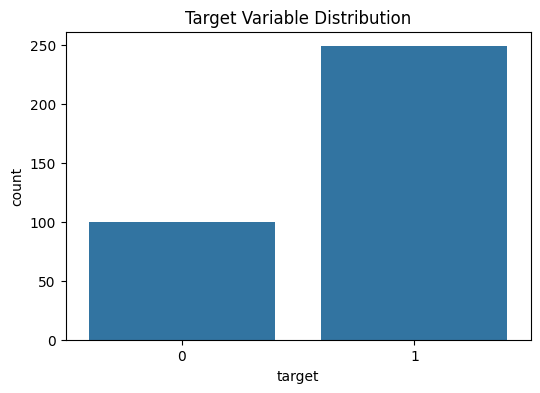

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - auc: 0.6260 - loss: 0.7325 - val_auc: 0.6360 - val_loss: 0.6797
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6046 - loss: 0.7166 - val_auc: 0.6730 - val_loss: 0.6143
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.5771 - loss: 0.6232 - val_auc: 0.7030 - val_loss: 0.5744
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6101 - loss: 0.6138 - val_auc: 0.7310 - val_loss: 0.5509
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6121 - loss: 0.5848 - val_auc: 0.7480 - val_loss: 0.5365
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6027 - loss: 0.5807 - val_auc: 0.7665 - val_loss: 0.5249
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6028 - loss: 0.6014 - val_auc: 0.7730 - val_loss: 0.5152
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.5987 - loss: 0.6226 - val_auc: 0.7780 - val_loss: 0.5097
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6363 - loss: 0.6116 - val_auc:

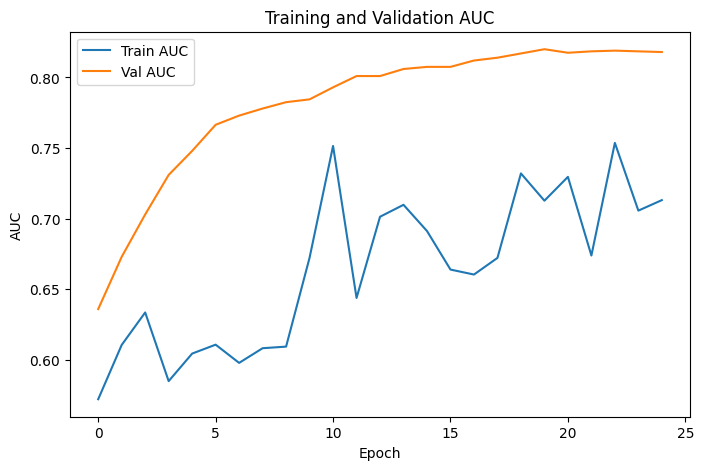

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
Dataset: ../Competition_data/Dataset_38
Accuracy: 0.7285714285714285, Precision: 0.7246376811594203, F1 Score: 0.8403361344537815, Custom Score: 0.7605273413713312


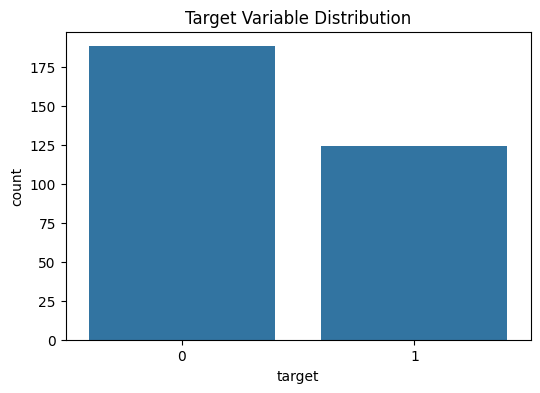

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - auc: 0.5551 - loss: 0.7267 - val_auc: 0.7944 - val_loss: 0.5836
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6304 - loss: 0.6575 - val_auc: 0.8378 - val_loss: 0.5413
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7931 - loss: 0.5260 - val_auc: 0.8699 - val_loss: 0.5047
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7981 - loss: 0.5546 - val_auc: 0.8883 - val_loss: 0.4731
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8693 - loss: 0.4645 - val_auc: 0.8923 - val_loss: 0.4463
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8469 - loss: 0.4532 - val_auc: 0.9015 - val_loss: 0.4232
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8850 - loss: 0.4371 - val_auc: 0.9082 - val_loss: 0.4013
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9113 - loss: 0.3957 - val_auc: 0.9071 - val_loss: 0.3813
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9100 - loss: 0.3924 - val_auc:

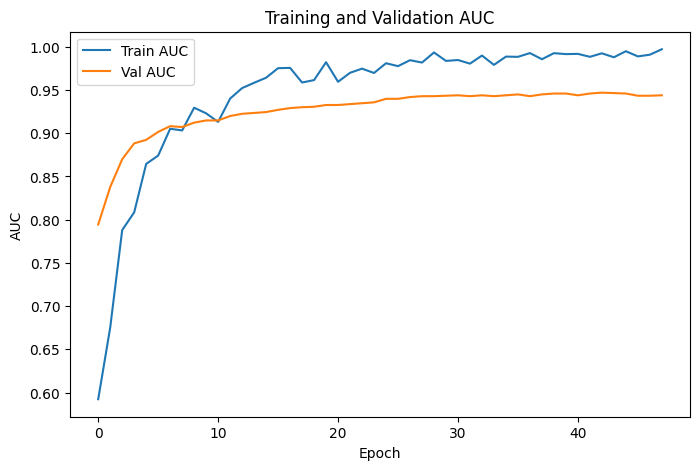

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Dataset: ../Competition_data/Dataset_6
Accuracy: 0.9523809523809523, Precision: 0.9032258064516129, F1 Score: 0.9491525423728814, Custom Score: 0.9317503710067954


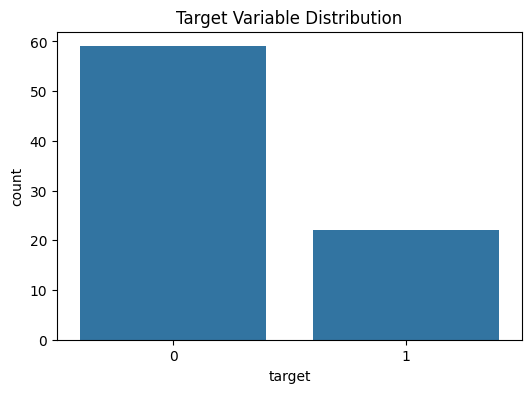

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - auc: 0.6047 - loss: 0.7551 - val_auc: 0.7500 - val_loss: 0.6582
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.5025 - loss: 0.8400 - val_auc: 0.7576 - val_loss: 0.6357
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.6471 - loss: 0.7390 - val_auc: 0.7576 - val_loss: 0.6190
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.6734 - loss: 0.7225 - val_auc: 0.7576 - val_loss: 0.6067
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc: 0.6280 - loss: 0.6751 - val_auc: 0.7576 - val_loss: 0.5970
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc: 0.7449 - loss: 0.6341 - val_auc: 0.7500 - val_loss: 0.5908
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.5862 - loss: 0.6949 - val_auc: 0.7424 - val_loss: 0.5887


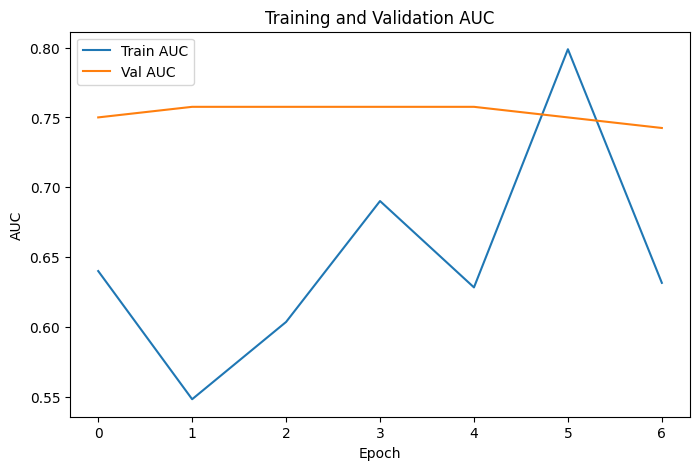

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Dataset: ../Competition_data/Dataset_31
Accuracy: 0.7058823529411765, Precision: 0.5714285714285714, F1 Score: 0.6153846153846154, Custom Score: 0.6249515190691661


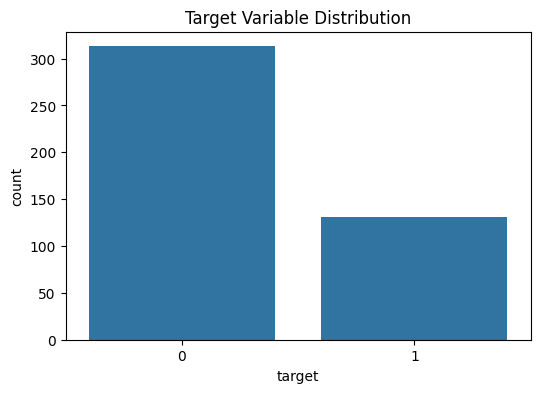

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.4343 - loss: 0.7919 - val_auc: 0.4661 - val_loss: 0.6286
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5023 - loss: 0.7089 - val_auc: 0.5166 - val_loss: 0.5974
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4675 - loss: 0.7155 - val_auc: 0.5807 - val_loss: 0.5766
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5398 - loss: 0.7099 - val_auc: 0.6214 - val_loss: 0.5663
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6164 - loss: 0.6046 - val_auc: 0.6513 - val_loss: 0.5562
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5260 - loss: 0.6784 - val_auc: 0.6604 - val_loss: 0.5517
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6420 - loss: 0.5967 - val_auc: 0.6669 - val_loss: 0.5439
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6456 - loss: 0.6214 - val_auc: 0.6815 - val_loss: 0.5359
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6089 - loss: 

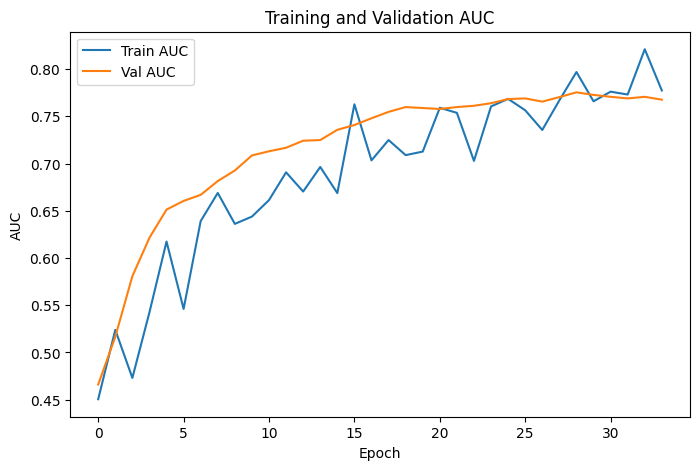

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
Dataset: ../Competition_data/Dataset_1
Accuracy: 0.7752808988764045, Precision: 0.625, F1 Score: 0.3333333333333333, Custom Score: 0.5825842696629213


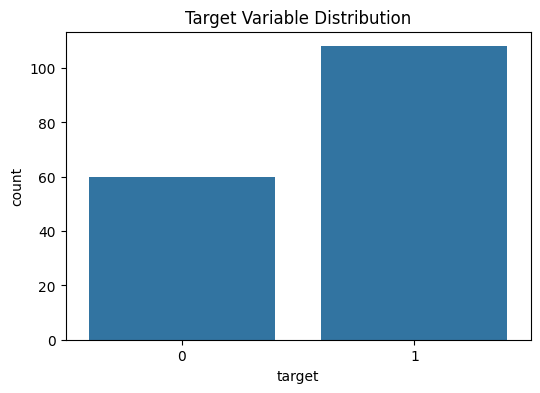

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - auc: 0.4641 - loss: 0.9040 - val_auc: 0.3901 - val_loss: 0.7493
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4152 - loss: 0.9914 - val_auc: 0.4341 - val_loss: 0.7165
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.4489 - loss: 0.9258 - val_auc: 0.4872 - val_loss: 0.6921
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4581 - loss: 0.8154 - val_auc: 0.5128 - val_loss: 0.6724
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.4915 - loss: 0.7966 - val_auc: 0.5733 - val_loss: 0.6542
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5530 - loss: 0.7179 - val_auc: 0.6099 - val_loss: 0.6421
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6335 - loss: 0.6778 - val_auc: 0.6465 - val_loss: 0.6309
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.5749 - loss: 0.7397 - val_auc: 0.6850 - val_loss: 0.6203
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.6015 - loss: 0.6954 - val_auc:

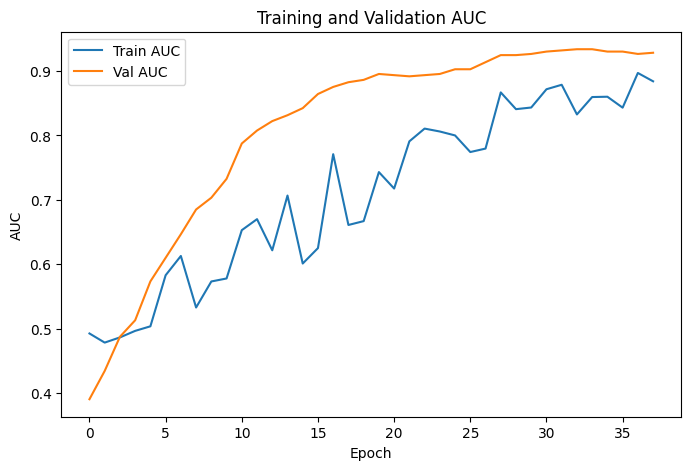

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Dataset: ../Competition_data/Dataset_36
Accuracy: 0.7941176470588235, Precision: 0.75, F1 Score: 0.8571428571428571, Custom Score: 0.7953781512605043


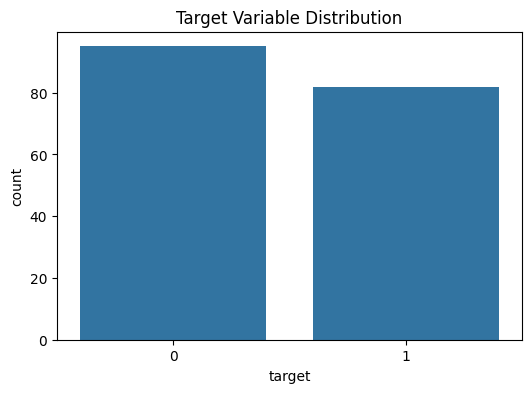

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - auc: 0.5093 - loss: 0.7400 - val_auc: 0.5278 - val_loss: 0.6988
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.5418 - loss: 0.7279 - val_auc: 0.6435 - val_loss: 0.6696
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5761 - loss: 0.7023 - val_auc: 0.7145 - val_loss: 0.6444
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6241 - loss: 0.6757 - val_auc: 0.7531 - val_loss: 0.6213
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5411 - loss: 0.7513 - val_auc: 0.7994 - val_loss: 0.6022
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7342 - loss: 0.5979 - val_auc: 0.8164 - val_loss: 0.5853
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7946 - loss: 0.5777 - val_auc: 0.8380 - val_loss: 0.5689
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7284 - loss: 0.6044 - val_auc: 0.8519 - val_loss: 0.5546
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7907 - loss: 0.5656 - val_auc

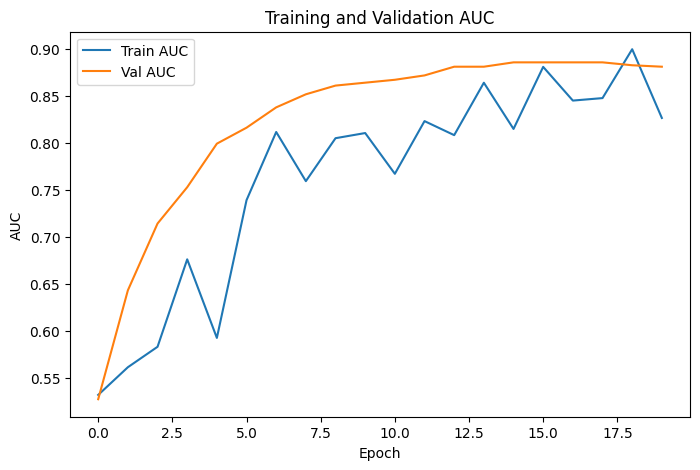

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Dataset: ../Competition_data/Dataset_37
Accuracy: 0.7222222222222222, Precision: 0.8333333333333334, F1 Score: 0.6666666666666666, Custom Score: 0.75


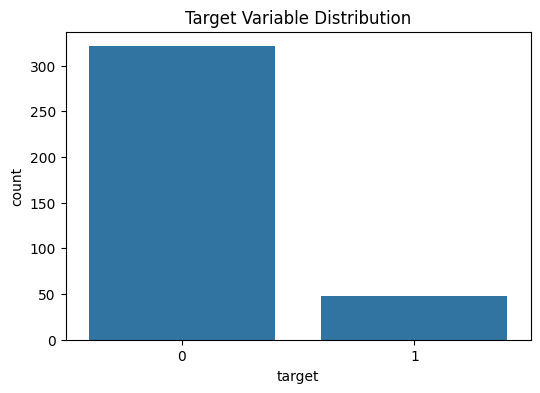

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.4171 - loss: 0.5901 - val_auc: 0.4126 - val_loss: 0.4079
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5329 - loss: 0.5196 - val_auc: 0.5586 - val_loss: 0.3718
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5839 - loss: 0.5257 - val_auc: 0.6343 - val_loss: 0.3469
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5970 - loss: 0.4476 - val_auc: 0.7036 - val_loss: 0.3278
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6746 - loss: 0.4315 - val_auc: 0.7537 - val_loss: 0.3115
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6840 - loss: 0.4065 - val_auc: 0.7793 - val_loss: 0.2965
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8320 - loss: 0.3248 - val_auc: 0.8038 - val_loss: 0.2848
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7327 - loss: 0.3752 - val_auc: 0.8102 - val_loss: 0.2732
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7504 - loss:

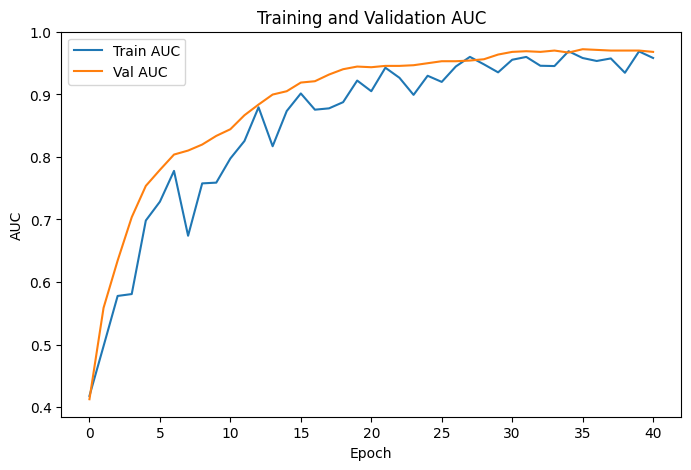

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
Dataset: ../Competition_data/Dataset_7
Accuracy: 0.9594594594594594, Precision: 0.75, F1 Score: 0.8, Custom Score: 0.8278378378378379


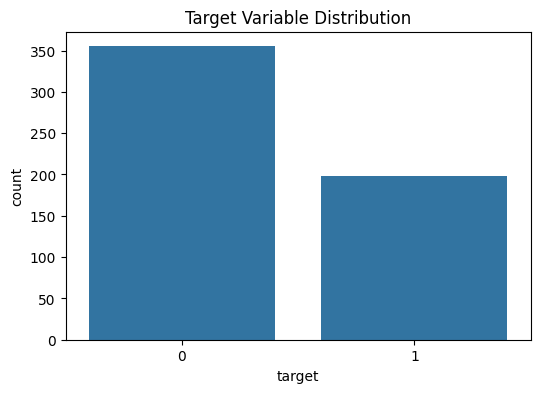

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc: 0.5260 - loss: 0.9020 - val_auc: 0.5283 - val_loss: 0.7017
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5241 - loss: 0.7977 - val_auc: 0.5785 - val_loss: 0.6616
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5691 - loss: 0.6897 - val_auc: 0.6245 - val_loss: 0.6461
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6167 - loss: 0.6494 - val_auc: 0.6635 - val_loss: 0.6340
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6053 - loss: 0.6712 - val_auc: 0.6896 - val_loss: 0.6208
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6436 - loss: 0.6175 - val_auc: 0.7135 - val_loss: 0.6092
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6127 - loss: 0.6433 - val_auc: 0.7224 - val_loss: 0.6009
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.7148 - loss: 0.5856 - val_auc: 0.7351 - val_loss: 0.5874
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6928 - loss: 

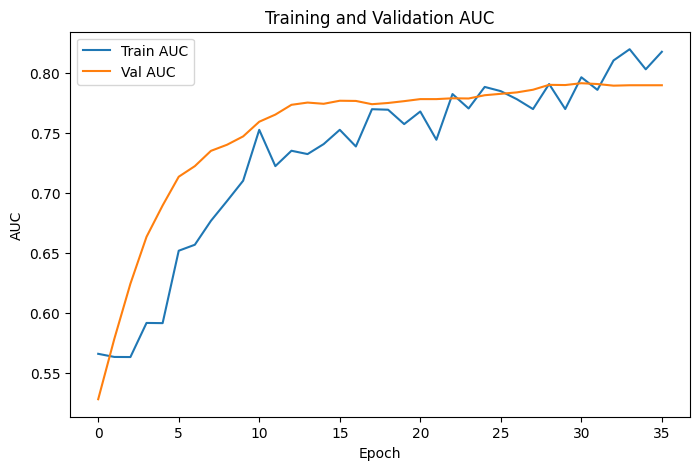

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
Dataset: ../Competition_data/Dataset_30
Accuracy: 0.7747747747747747, Precision: 0.9130434782608695, F1 Score: 0.6268656716417911, Custom Score: 0.7857095252293176


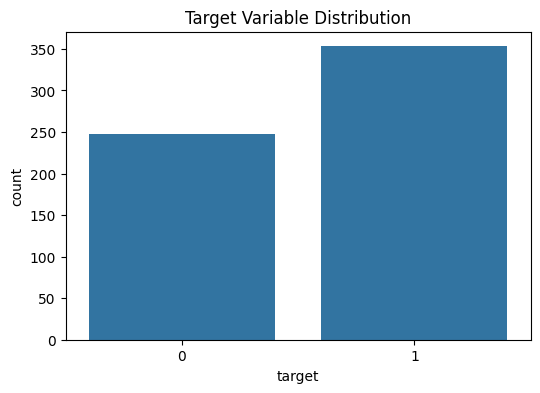

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.5990 - loss: 0.7351 - val_auc: 0.9274 - val_loss: 0.5388
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7424 - loss: 0.5959 - val_auc: 0.9686 - val_loss: 0.4426
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.7852 - loss: 0.5412 - val_auc: 0.9793 - val_loss: 0.3743
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8934 - loss: 0.4276 - val_auc: 0.9835 - val_loss: 0.3149
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.9184 - loss: 0.3840 - val_auc: 0.9868 - val_loss: 0.2704
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9323 - loss: 0.3494 - val_auc: 0.9887 - val_loss: 0.2346
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9433 - loss: 0.3188 - val_auc: 0.9896 - val_loss: 0.2085
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9517 - loss: 0.2964 - val_auc: 0.9899 - val_loss: 0.1861
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9605 - loss: 

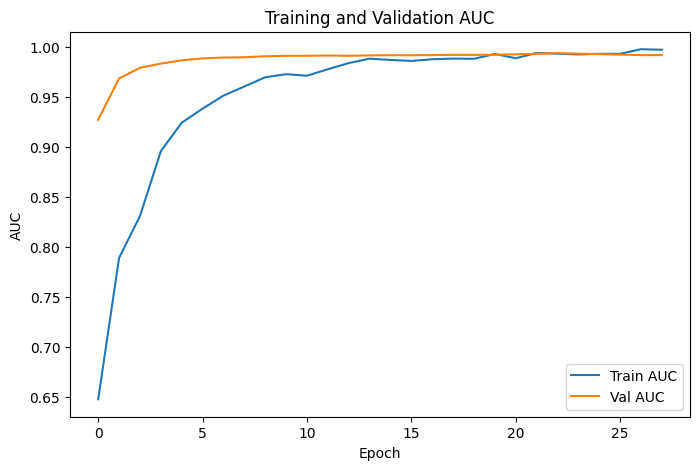

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
Dataset: ../Competition_data/Dataset_39
Accuracy: 0.95, Precision: 0.9852941176470589, F1 Score: 0.9571428571428572, Custom Score: 0.9662605042016807


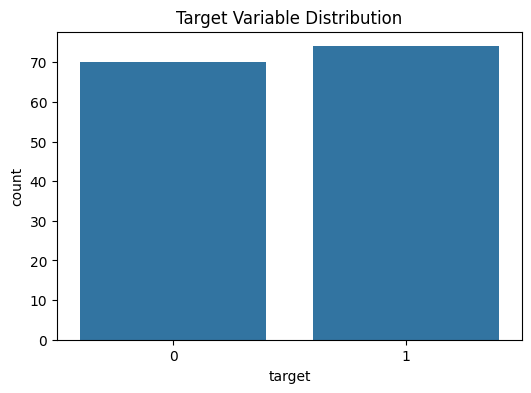

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - auc: 0.5410 - loss: 0.7601 - val_auc: 0.8606 - val_loss: 0.5781
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.6484 - loss: 0.6471 - val_auc: 0.8822 - val_loss: 0.5392
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6231 - loss: 0.7194 - val_auc: 0.8942 - val_loss: 0.5079
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6943 - loss: 0.6436 - val_auc: 0.8870 - val_loss: 0.4839
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7567 - loss: 0.5920 - val_auc: 0.8798 - val_loss: 0.4701
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7646 - loss: 0.6108 - val_auc: 0.8750 - val_loss: 0.4605
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8606 - loss: 0.4861 - val_auc: 0.8750 - val_loss: 0.4521
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.8089 - loss: 0.5464 - val_auc: 0.8750 - val_loss: 0.4452


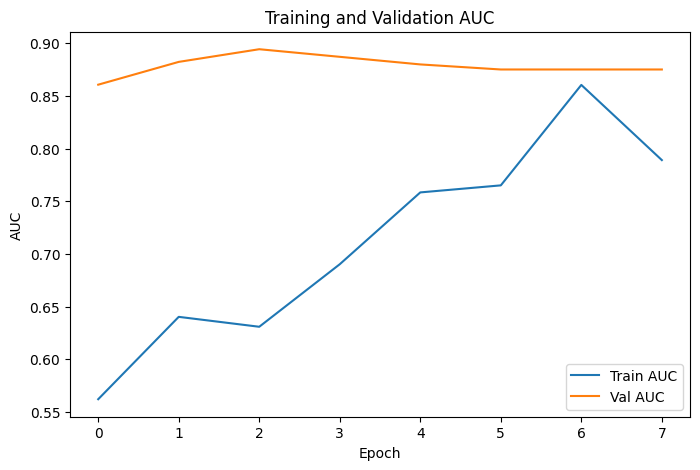

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Dataset: ../Competition_data/Dataset_9
Accuracy: 0.8620689655172413, Precision: 0.8, F1 Score: 0.8571428571428571, Custom Score: 0.8357635467980296


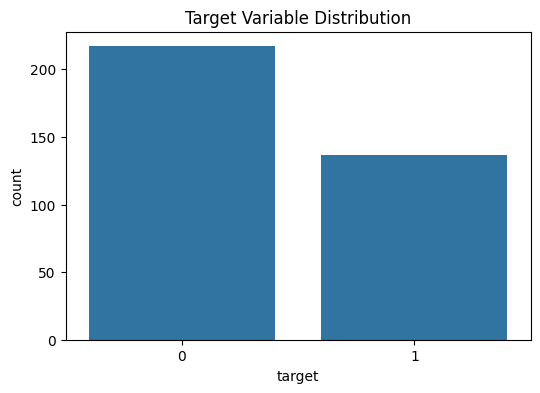

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - auc: 0.4270 - loss: 0.8641 - val_auc: 0.5355 - val_loss: 0.7083
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5270 - loss: 0.7809 - val_auc: 0.7261 - val_loss: 0.6466
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5320 - loss: 0.7859 - val_auc: 0.8395 - val_loss: 0.6016
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6119 - loss: 0.6785 - val_auc: 0.8648 - val_loss: 0.5671
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7050 - loss: 0.6157 - val_auc: 0.8763 - val_loss: 0.5368
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7334 - loss: 0.6066 - val_auc: 0.8754 - val_loss: 0.5147
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7202 - loss: 0.6025 - val_auc: 0.8790 - val_loss: 0.4934
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7874 - loss: 0.5360 - val_auc: 0.8803 - val_loss: 0.4724
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7433 - loss: 0.5817 - val_auc:

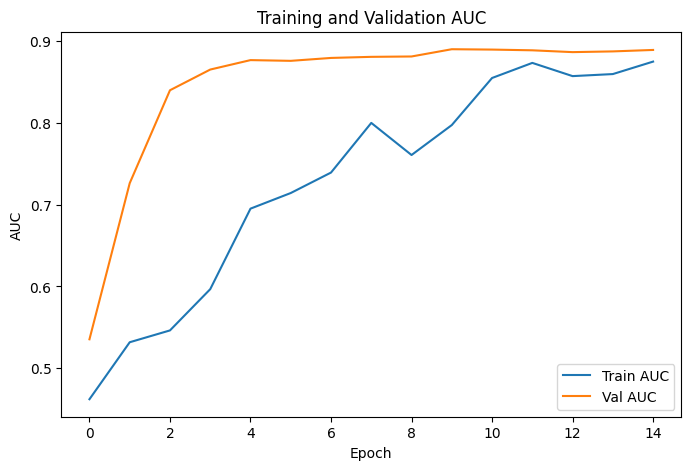

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
Dataset: ../Competition_data/Dataset_23
Accuracy: 0.8732394366197183, Precision: 0.8260869565217391, F1 Score: 0.8085106382978723, Custom Score: 0.8349598050839728


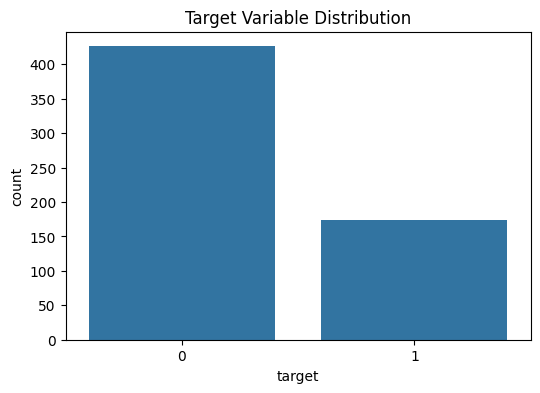

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.6049 - loss: 0.6575 - val_auc: 0.5492 - val_loss: 0.6280
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5402 - loss: 0.6597 - val_auc: 0.5826 - val_loss: 0.6053
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5749 - loss: 0.6192 - val_auc: 0.6106 - val_loss: 0.5901
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5816 - loss: 0.6200 - val_auc: 0.6264 - val_loss: 0.5854
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6258 - loss: 0.5690 - val_auc: 0.6365 - val_loss: 0.5790
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6218 - loss: 0.6059 - val_auc: 0.6483 - val_loss: 0.5769
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5608 - loss: 0.6241 - val_auc: 0.6436 - val_loss: 0.5766
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6728 - loss: 0.5766 - val_auc: 0.6477 - val_loss: 0.5761
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5683 - loss:

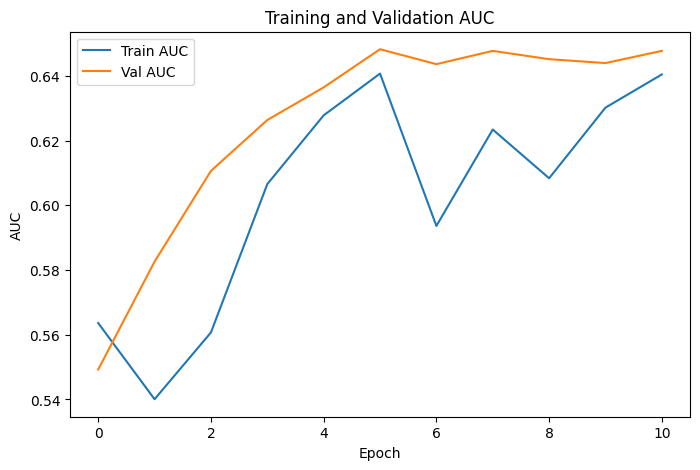

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
Dataset: ../Competition_data/Dataset_24
Accuracy: 0.7166666666666667, Precision: 0.5, F1 Score: 0.10526315789473684, Custom Score: 0.4465789473684211


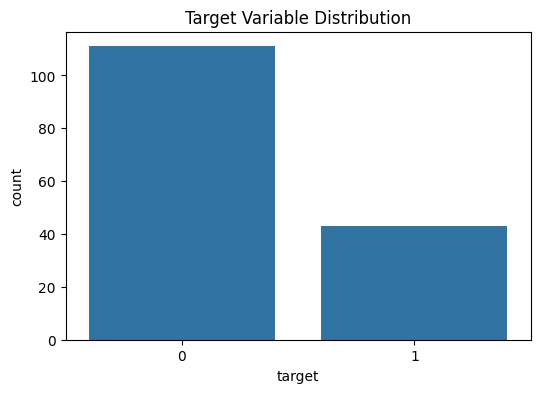

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - auc: 0.4766 - loss: 0.7324 - val_auc: 0.5833 - val_loss: 0.6824
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4693 - loss: 0.7495 - val_auc: 0.6048 - val_loss: 0.6659
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5094 - loss: 0.6916 - val_auc: 0.6405 - val_loss: 0.6517
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4658 - loss: 0.6891 - val_auc: 0.6429 - val_loss: 0.6388
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5765 - loss: 0.6352 - val_auc: 0.6476 - val_loss: 0.6273
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5600 - loss: 0.6318 - val_auc: 0.6571 - val_loss: 0.6177
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6488 - loss: 0.6093 - val_auc: 0.6643 - val_loss: 0.6097
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6813 - loss: 0.5562 - val_auc: 0.6738 - val_loss: 0.6028
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6453 - loss: 0.5726 - val_auc:

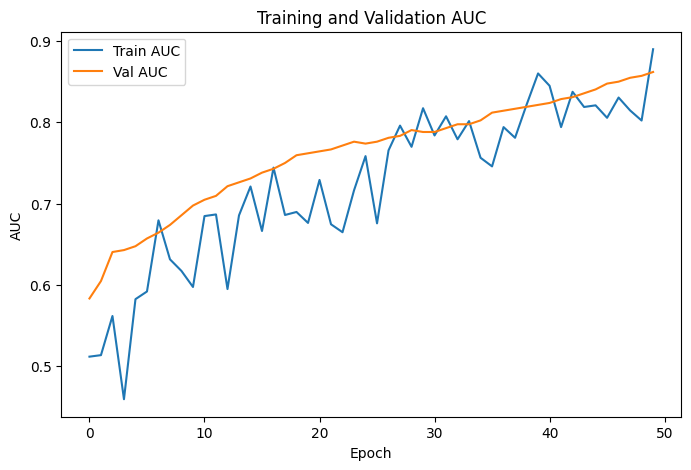

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Dataset: ../Competition_data/Dataset_12
Accuracy: 0.7419354838709677, Precision: 1.0, F1 Score: 0.3333333333333333, Custom Score: 0.7225806451612903


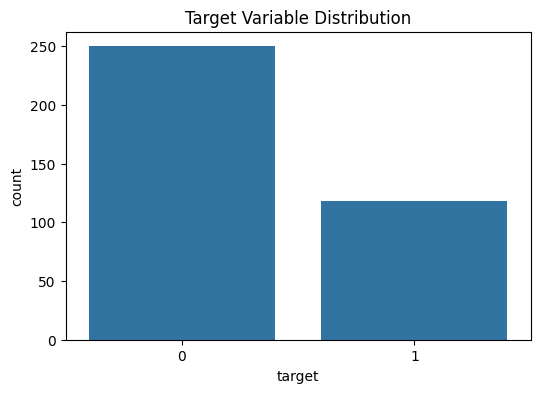

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.4321 - loss: 0.8416 - val_auc: 0.3975 - val_loss: 0.6996
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5668 - loss: 0.6905 - val_auc: 0.4050 - val_loss: 0.6842
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5574 - loss: 0.6751 - val_auc: 0.4225 - val_loss: 0.6715
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5230 - loss: 0.7111 - val_auc: 0.4221 - val_loss: 0.6610
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5520 - loss: 0.6698 - val_auc: 0.4454 - val_loss: 0.6562
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5187 - loss: 0.6796 - val_auc: 0.4608 - val_loss: 0.6524
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5767 - loss: 0.6510 - val_auc: 0.4829 - val_loss: 0.6481
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5285 - loss: 0.7338 - val_auc: 0.4937 - val_loss: 0.6453
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5755 - loss:

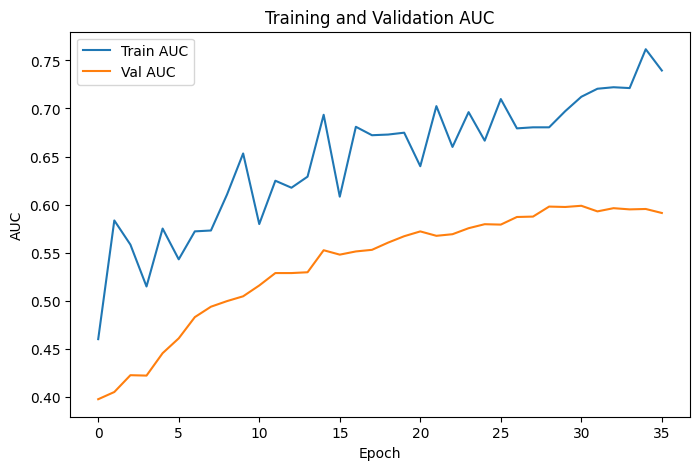

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
Dataset: ../Competition_data/Dataset_15
Accuracy: 0.7027027027027027, Precision: 0.5833333333333334, F1 Score: 0.3888888888888889, Custom Score: 0.5608108108108109


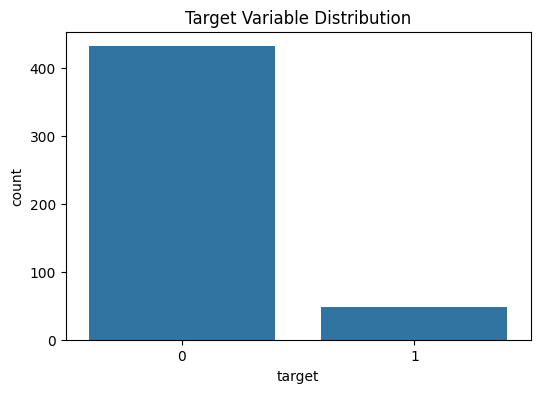

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc: 0.5247 - loss: 0.8494 - val_auc: 0.6594 - val_loss: 0.6601
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.4200 - loss: 0.6802 - val_auc: 0.6219 - val_loss: 0.5495
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5772 - loss: 0.5458 - val_auc: 0.6446 - val_loss: 0.4808
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5999 - loss: 0.4586 - val_auc: 0.6881 - val_loss: 0.4316
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5422 - loss: 0.4254 - val_auc: 0.7224 - val_loss: 0.3973
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7048 - loss: 0.3745 - val_auc: 0.7567 - val_loss: 0.3716
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6413 - loss: 0.3747 - val_auc: 0.7901 - val_loss: 0.3513
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6417 - loss: 0.3187 - val_auc: 0.8100 - val_loss: 0.3352
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6352 - loss: 

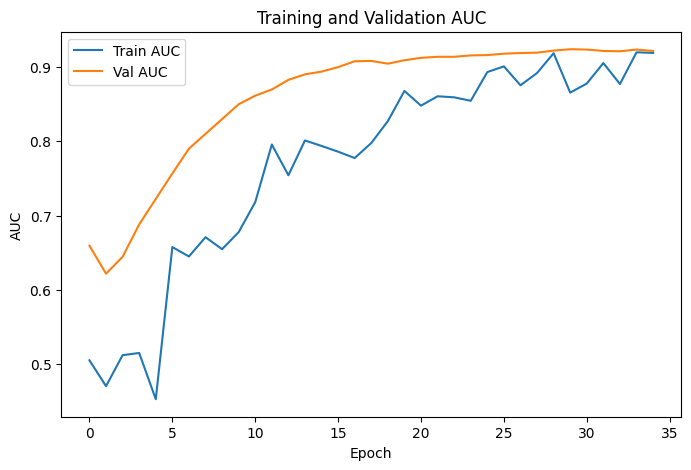

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
Dataset: ../Competition_data/Dataset_41
Accuracy: 0.8854166666666666, Precision: 0.6666666666666666, F1 Score: 0.42105263157894735, Custom Score: 0.6586074561403508


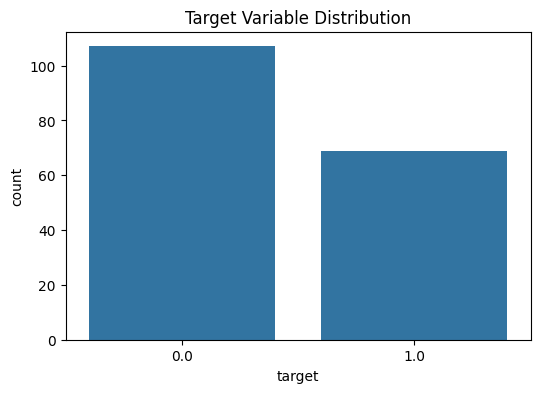

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - auc: 0.5693 - loss: 0.7286 - val_auc: 0.6317 - val_loss: 0.6635
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.6574 - loss: 0.6568 - val_auc: 0.7905 - val_loss: 0.6263
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6697 - loss: 0.6579 - val_auc: 0.8683 - val_loss: 0.5957
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.6649 - loss: 0.6426 - val_auc: 0.9254 - val_loss: 0.5662
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6006 - loss: 0.6796 - val_auc: 0.9429 - val_loss: 0.5415
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6882 - loss: 0.6053 - val_auc: 0.9524 - val_loss: 0.5196
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7803 - loss: 0.5677 - val_auc: 0.9587 - val_loss: 0.4970
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7496 - loss: 0.5845 - val_auc: 0.9651 - val_loss: 0.4732
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.7934 - loss: 0.5408 - val_auc

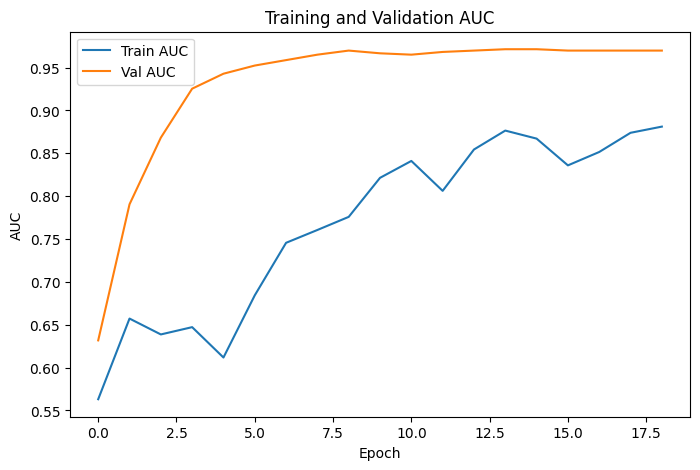

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Dataset: ../Competition_data/Dataset_46
Accuracy: 0.8888888888888888, Precision: 0.9230769230769231, F1 Score: 0.8571428571428571, Custom Score: 0.893040293040293


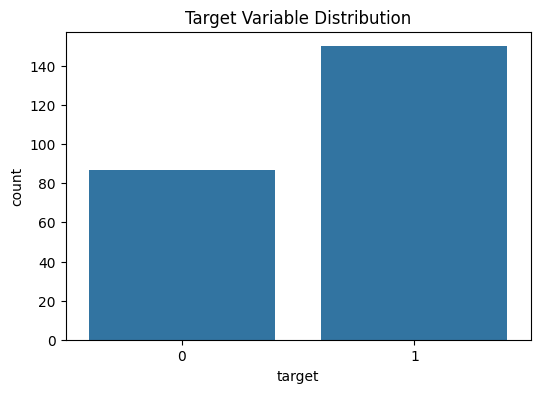

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - auc: 0.4141 - loss: 1.0313 - val_auc: 0.5351 - val_loss: 0.7624
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5378 - loss: 0.8632 - val_auc: 0.6395 - val_loss: 0.6948
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5979 - loss: 0.7560 - val_auc: 0.6860 - val_loss: 0.6417
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6577 - loss: 0.6743 - val_auc: 0.7495 - val_loss: 0.6003
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6370 - loss: 0.6934 - val_auc: 0.7856 - val_loss: 0.5656
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6152 - loss: 0.7107 - val_auc: 0.8083 - val_loss: 0.5406
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6519 - loss: 0.6417 - val_auc: 0.8378 - val_loss: 0.5172
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.7620 - loss: 0.5243 - val_auc: 0.8539 - val_loss: 0.4982
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6934 - loss: 0.6395 - val_auc:

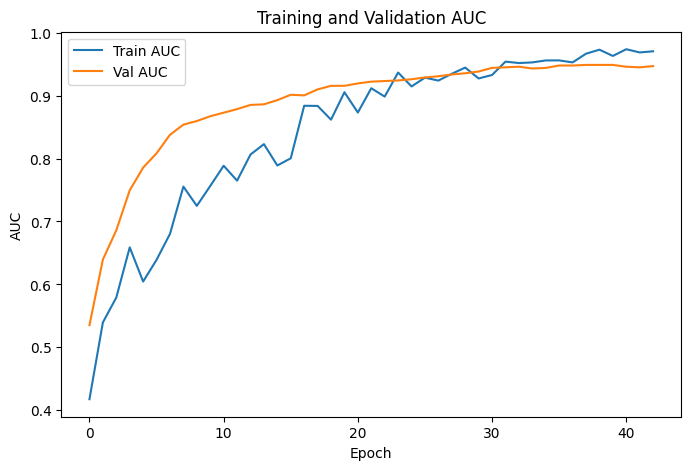

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Dataset: ../Competition_data/Dataset_48
Accuracy: 0.8541666666666666, Precision: 0.9, F1 Score: 0.8852459016393442, Custom Score: 0.8818237704918033


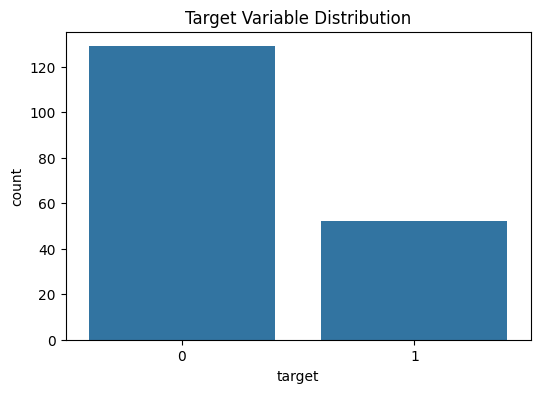

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - auc: 0.4764 - loss: 1.3636 - val_auc: 0.5000 - val_loss: 0.8185
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.5263 - loss: 1.0047 - val_auc: 0.5750 - val_loss: 0.7321
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.5848 - loss: 0.9916 - val_auc: 0.6350 - val_loss: 0.6671
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5508 - loss: 0.8185 - val_auc: 0.6567 - val_loss: 0.6202
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6807 - loss: 0.6087 - val_auc: 0.7150 - val_loss: 0.5861
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6240 - loss: 0.6953 - val_auc: 0.7483 - val_loss: 0.5598
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5850 - loss: 0.7558 - val_auc: 0.7917 - val_loss: 0.5371
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.7680 - loss: 0.5561 - val_auc: 0.8333 - val_loss: 0.5159
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6729 - loss: 0.6283 - val_auc:

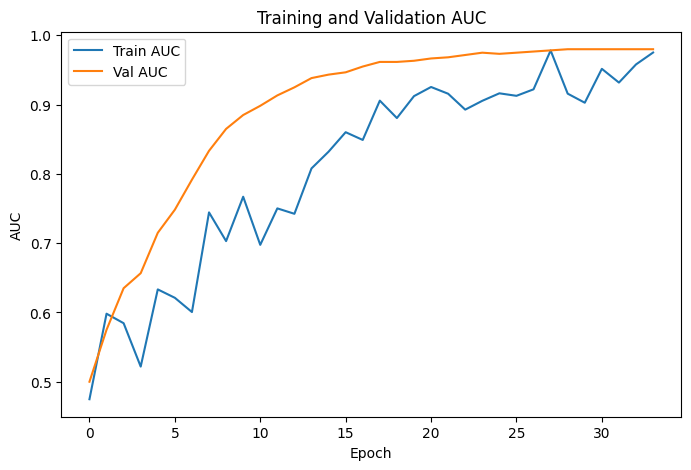

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Dataset: ../Competition_data/Dataset_14
Accuracy: 0.918918918918919, Precision: 0.9090909090909091, F1 Score: 0.8695652173913043, Custom Score: 0.9001816045294306


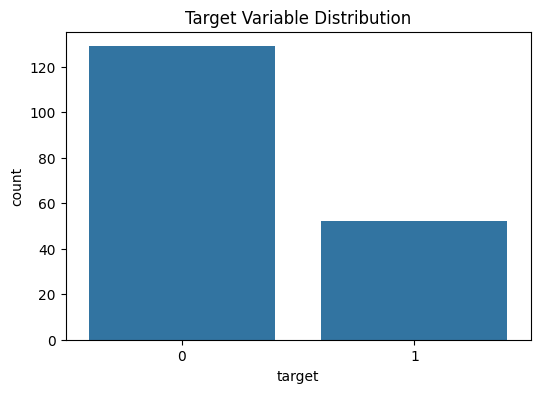

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - auc: 0.5141 - loss: 1.0047 - val_auc: 0.6000 - val_loss: 0.7637
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6388 - loss: 0.8251 - val_auc: 0.6167 - val_loss: 0.6779
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4401 - loss: 0.9840 - val_auc: 0.6133 - val_loss: 0.6213
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.5579 - loss: 0.8095 - val_auc: 0.6750 - val_loss: 0.5886
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5118 - loss: 0.8010 - val_auc: 0.6917 - val_loss: 0.5693
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5801 - loss: 0.6812 - val_auc: 0.7050 - val_loss: 0.5580
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4852 - loss: 0.7691 - val_auc: 0.7417 - val_loss: 0.5473
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6941 - loss: 0.5926 - val_auc: 0.7633 - val_loss: 0.5370
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.6645 - loss: 0.6125 - val_auc:

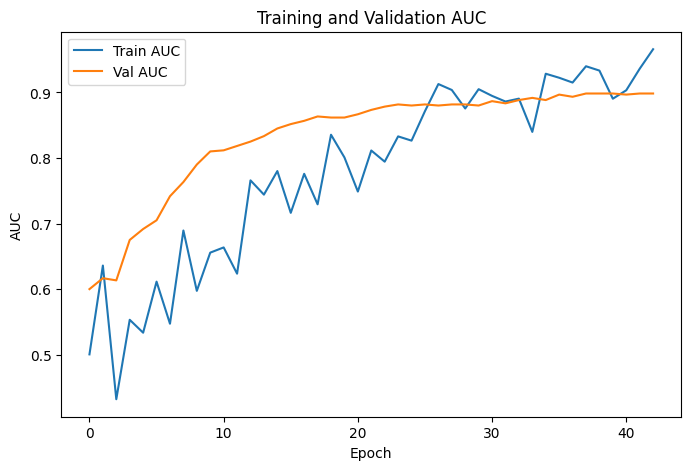

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Dataset: ../Competition_data/Dataset_13
Accuracy: 0.8648648648648649, Precision: 0.8888888888888888, F1 Score: 0.7619047619047619, Custom Score: 0.8435864435864436


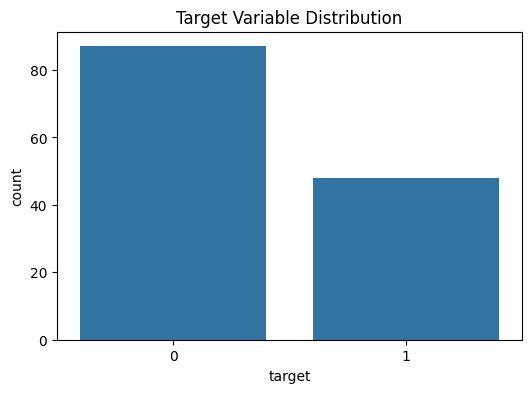

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - auc: 0.5381 - loss: 0.7070 - val_auc: 0.5093 - val_loss: 0.6717
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.4822 - loss: 0.7246 - val_auc: 0.5802 - val_loss: 0.6529
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6465 - loss: 0.6450 - val_auc: 0.6296 - val_loss: 0.6353
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.5298 - loss: 0.6762 - val_auc: 0.6574 - val_loss: 0.6201
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.5033 - loss: 0.7058 - val_auc: 0.7037 - val_loss: 0.6056
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.6188 - loss: 0.6333 - val_auc: 0.7531 - val_loss: 0.5921
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.6284 - loss: 0.6181 - val_auc: 0.7963 - val_loss: 0.5816
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.6657 - loss: 0.6201 - val_auc: 0.8148 - val_loss: 0.5730
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.6875 - loss: 0.5984 - val_au

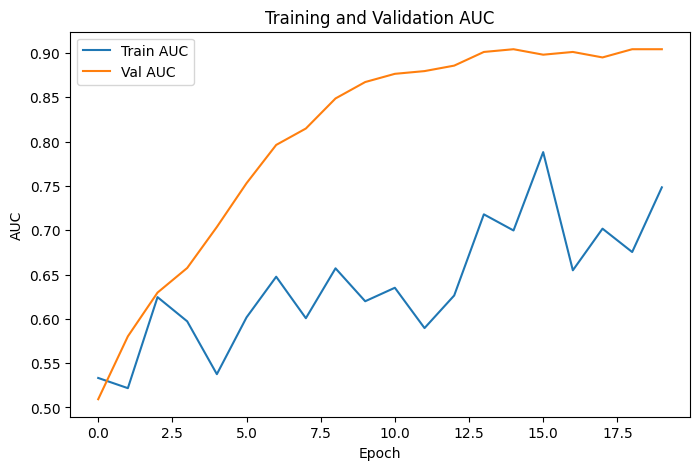

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Dataset: ../Competition_data/Dataset_25
Accuracy: 0.6666666666666666, Precision: 0.0, F1 Score: 0.0, Custom Score: 0.19999999999999998


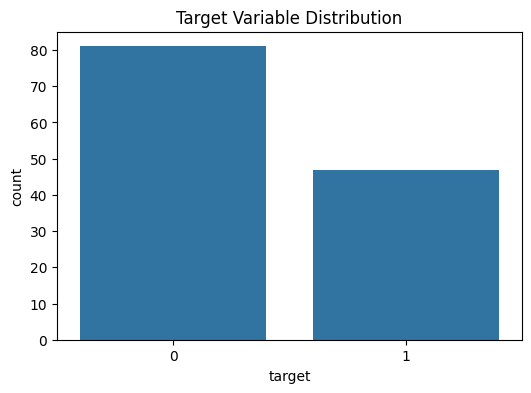

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - auc: 0.5341 - loss: 0.7443 - val_auc: 0.6078 - val_loss: 0.7026
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4759 - loss: 0.7654 - val_auc: 0.6209 - val_loss: 0.6799
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5794 - loss: 0.7054 - val_auc: 0.6209 - val_loss: 0.6597
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5890 - loss: 0.6650 - val_auc: 0.6405 - val_loss: 0.6453
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6803 - loss: 0.6584 - val_auc: 0.6536 - val_loss: 0.6320
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6034 - loss: 0.6474 - val_auc: 0.6634 - val_loss: 0.6210
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5521 - loss: 0.6714 - val_auc: 0.6699 - val_loss: 0.6129
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6384 - loss: 0.6532 - val_auc: 0.6863 - val_loss: 0.6058
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.6451 - loss: 0.6344 - val_auc:

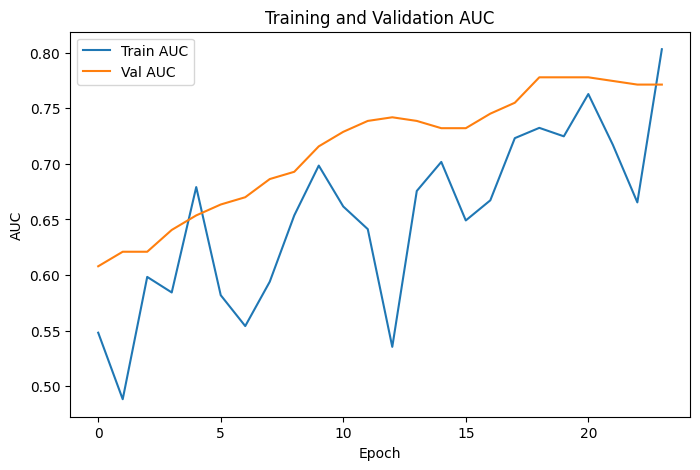

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/stepWARNING:tensorflow:5 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x32063e940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Dataset: ../Competition_data/Dataset_22
Accuracy: 0.7692307692307693, Precision: 0.71428571428

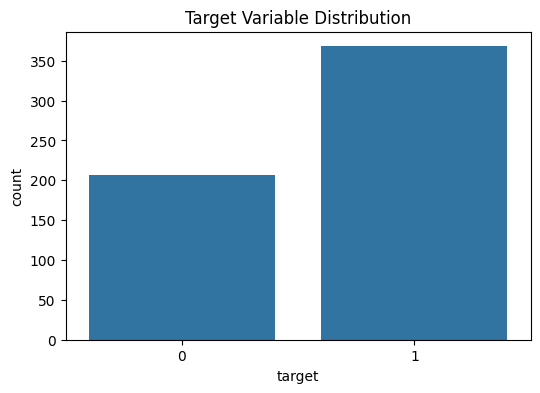

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.6468 - loss: 0.7356 - val_auc: 0.9318 - val_loss: 0.4274
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8301 - loss: 0.5004 - val_auc: 0.9710 - val_loss: 0.3286
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8713 - loss: 0.4276 - val_auc: 0.9779 - val_loss: 0.2849
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.9368 - loss: 0.3419 - val_auc: 0.9791 - val_loss: 0.2575
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9223 - loss: 0.3410 - val_auc: 0.9810 - val_loss: 0.2372
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.9407 - loss: 0.3070 - val_auc: 0.9799 - val_loss: 0.2238
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.9473 - loss: 0.2971 - val_auc: 0.9791 - val_loss: 0.2150
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.9410 - loss: 0.2919 - val_auc: 0.9794 - val_loss: 0.2143
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9517 - loss: 

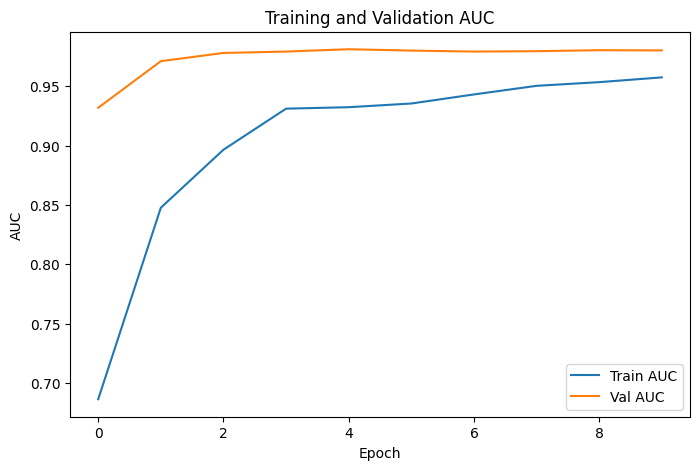

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step
Dataset: ../Competition_data/Dataset_49
Accuracy: 0.9130434782608695, Precision: 1.0, F1 Score: 0.927536231884058, Custom Score: 0.9521739130434783


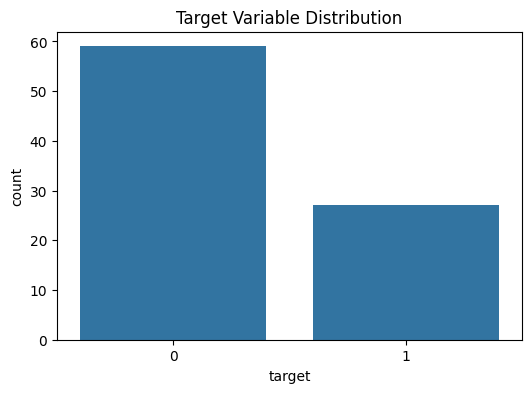

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - auc: 0.5158 - loss: 0.7462 - val_auc: 0.5089 - val_loss: 0.5943
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - auc: 0.4786 - loss: 0.8632 - val_auc: 0.5625 - val_loss: 0.5940
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.4345 - loss: 0.8804 - val_auc: 0.5982 - val_loss: 0.5882
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.6319 - loss: 0.6743 - val_auc: 0.6161 - val_loss: 0.5837
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.4603 - loss: 0.8010 - val_auc: 0.6250 - val_loss: 0.5778
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.6240 - loss: 0.6293 - val_auc: 0.6250 - val_loss: 0.5719
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.6334 - loss: 0.6773 - val_auc: 0.6250 - val_loss: 0.5665
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.6668 - loss: 0.6202 - val_auc: 0.6339 - val_loss: 0.5604
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.6193 - loss: 0.6167 - val_auc

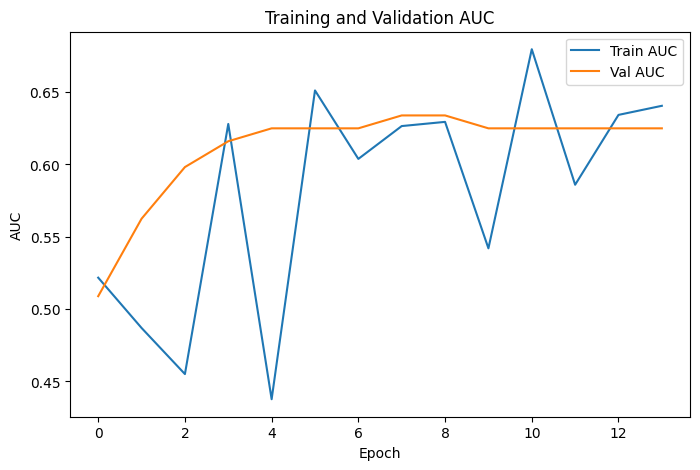

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Dataset: ../Competition_data/Dataset_47
Accuracy: 0.7777777777777778, Precision: 0.5, F1 Score: 0.3333333333333333, Custom Score: 0.5333333333333333


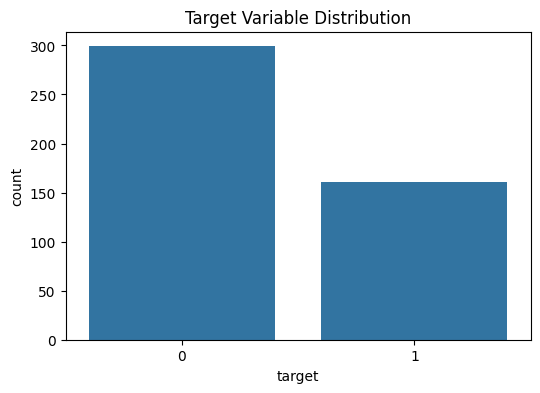

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.4729 - loss: 0.7289 - val_auc: 0.4613 - val_loss: 0.6693
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5545 - loss: 0.6758 - val_auc: 0.7341 - val_loss: 0.6304
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.5150 - loss: 0.6780 - val_auc: 0.8368 - val_loss: 0.6002
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.5988 - loss: 0.6614 - val_auc: 0.8503 - val_loss: 0.5773
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7003 - loss: 0.6047 - val_auc: 0.8503 - val_loss: 0.5570
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7573 - loss: 0.5804 - val_auc: 0.8546 - val_loss: 0.5411
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7587 - loss: 0.5691 - val_auc: 0.8516 - val_loss: 0.5232
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7496 - loss: 0.5661 - val_auc: 0.8481 - val_loss: 0.5065
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7543 - loss:

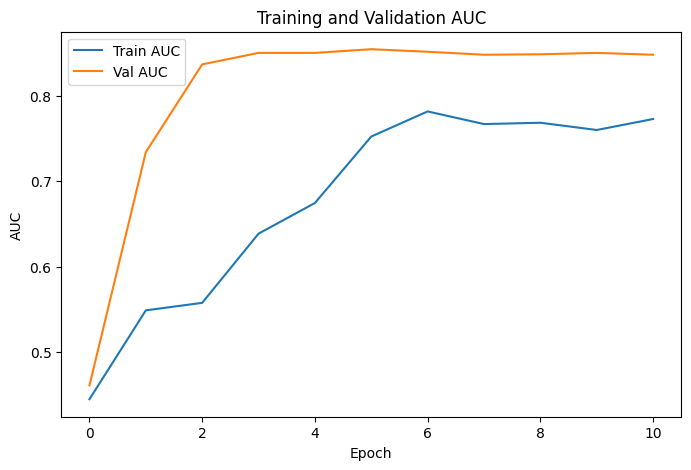

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
Dataset: ../Competition_data/Dataset_40
Accuracy: 0.8043478260869565, Precision: 0.7727272727272727, F1 Score: 0.6538461538461539, Custom Score: 0.7465491030708422


In [4]:

for dataset_folder in dataset_folders:
    # Load data
    X_train = pd.read_csv(os.path.join(dataset_folder, 'X_train.csv'))
    y_train = pd.read_csv(os.path.join(dataset_folder, 'y_train.csv'))
    X_test = pd.read_csv(os.path.join(dataset_folder, 'X_test.csv'))
    
    # Preprocess data
    X_train_scaled = preprocess_data(X_train, y_train)
    X_test_scaled = preprocess_data(X_test)
    
    # Split data
    X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
    
    # Create, train and evaluate model
    model = create_and_train_model(X_train_part, y_train_part, X_val, y_val, X_train_scaled.shape[1])
    
    # Inference
    y_pred_prob = model.predict(X_test_scaled).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate additional metrics on validation set
    accuracy = accuracy_score(y_val, model.predict(X_val) > 0.5)
    precision = precision_score(y_val, model.predict(X_val) > 0.5)
    f1 = f1_score(y_val, model.predict(X_val) > 0.5)
    score = accuracy * 0.3 + precision * 0.4 + f1 * 0.3
    print(f"Dataset: {dataset_folder}")
    print(f"Accuracy: {accuracy}, Precision: {precision}, F1 Score: {f1}, Custom Score: {score}")
    
    # Save predictions to y_predict.csv
    output_path = os.path.join(dataset_folder, 'y_predict.csv')
    pd.DataFrame(y_pred_prob, columns=['Predicted']).to_csv(output_path, index=False)
